In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

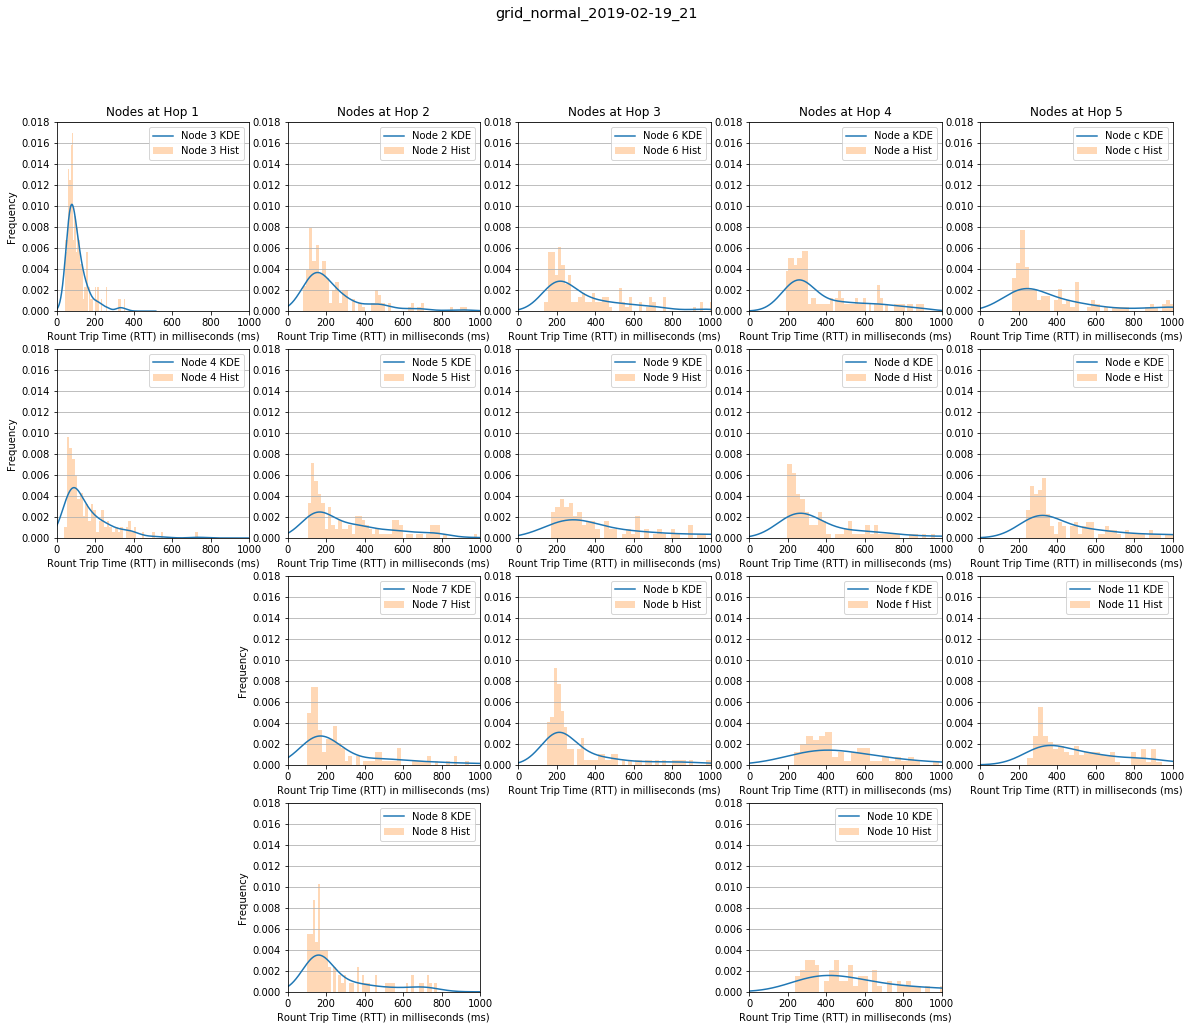

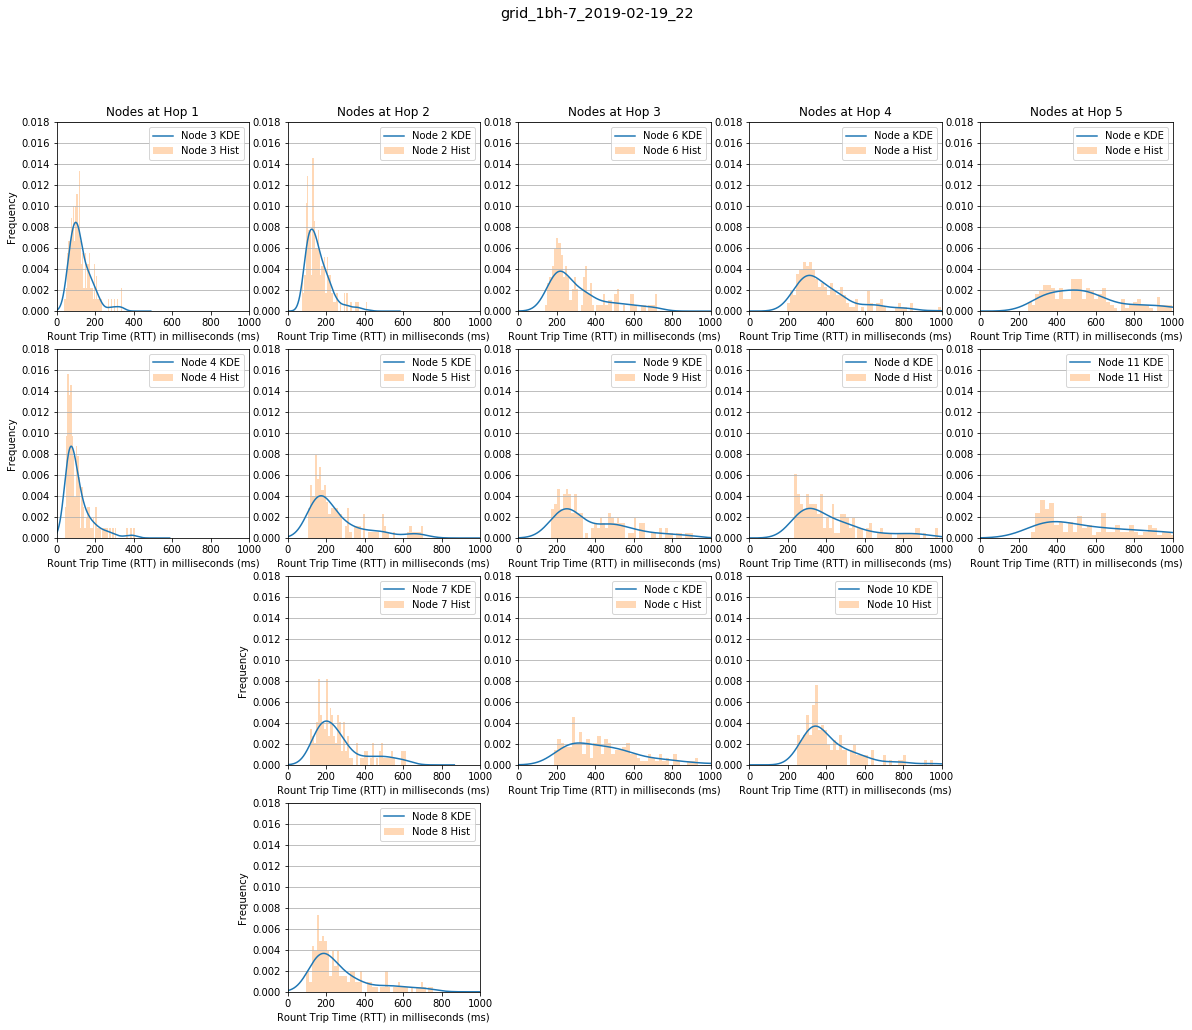

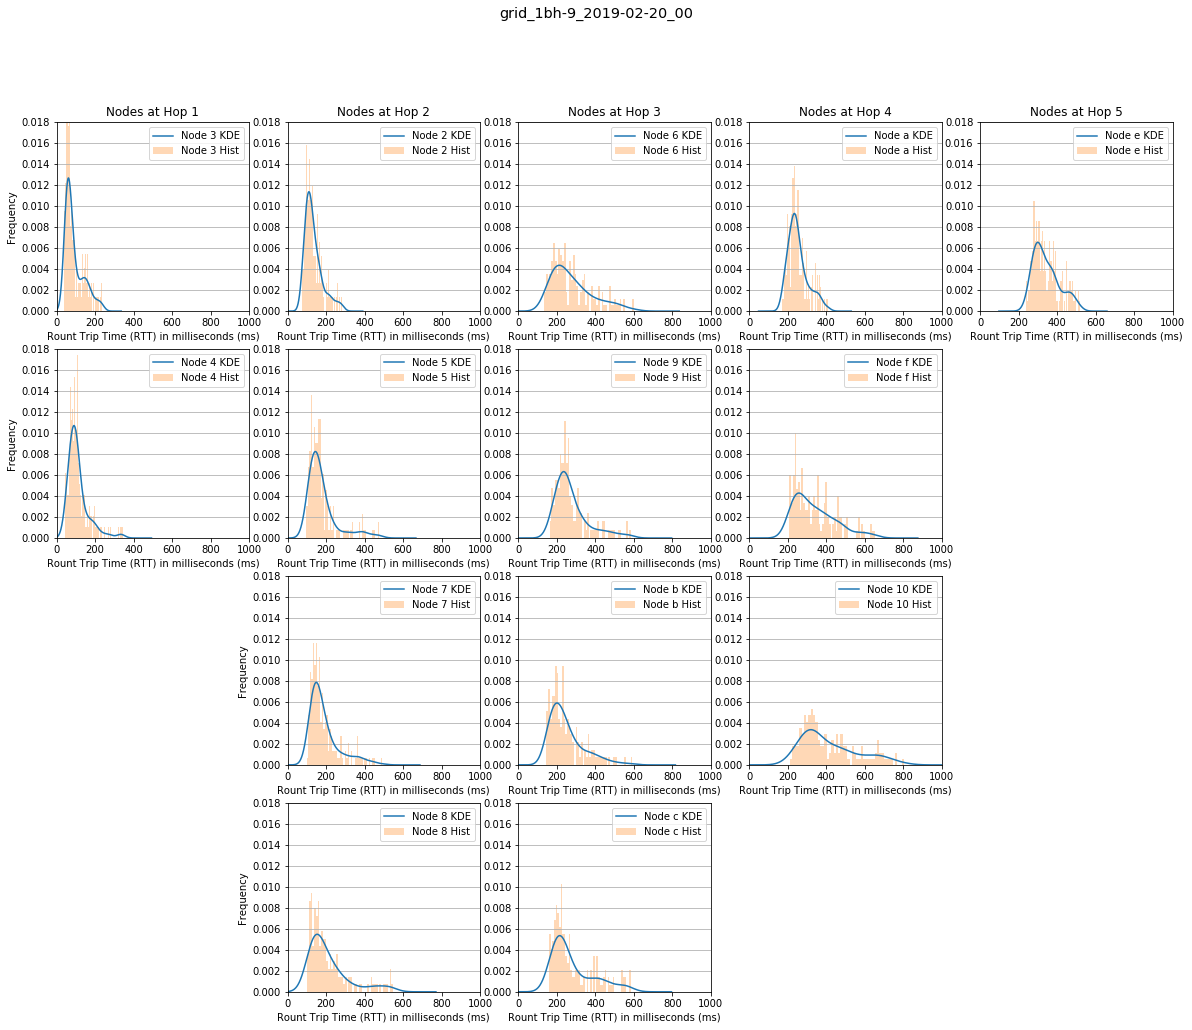

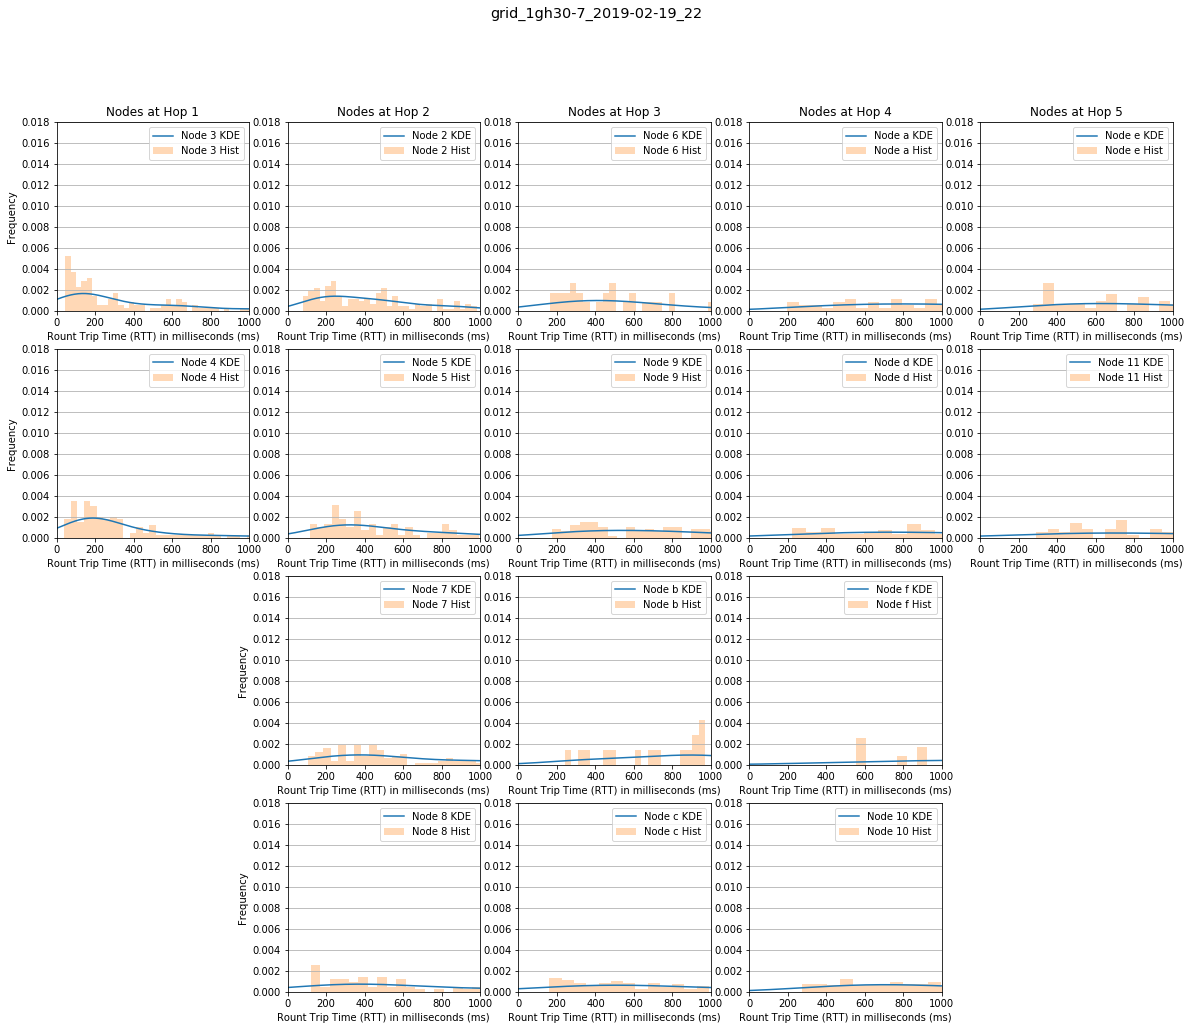

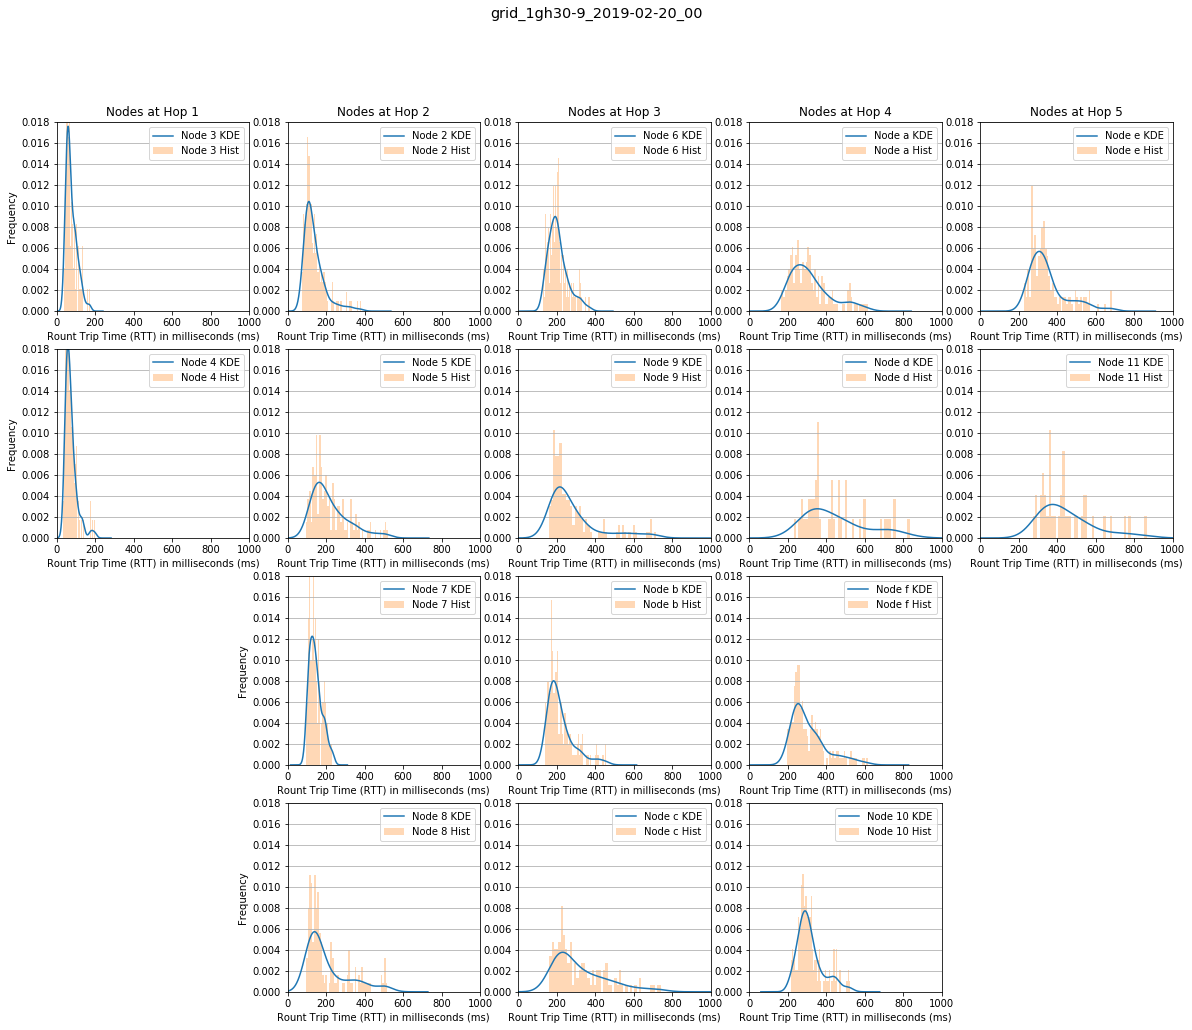

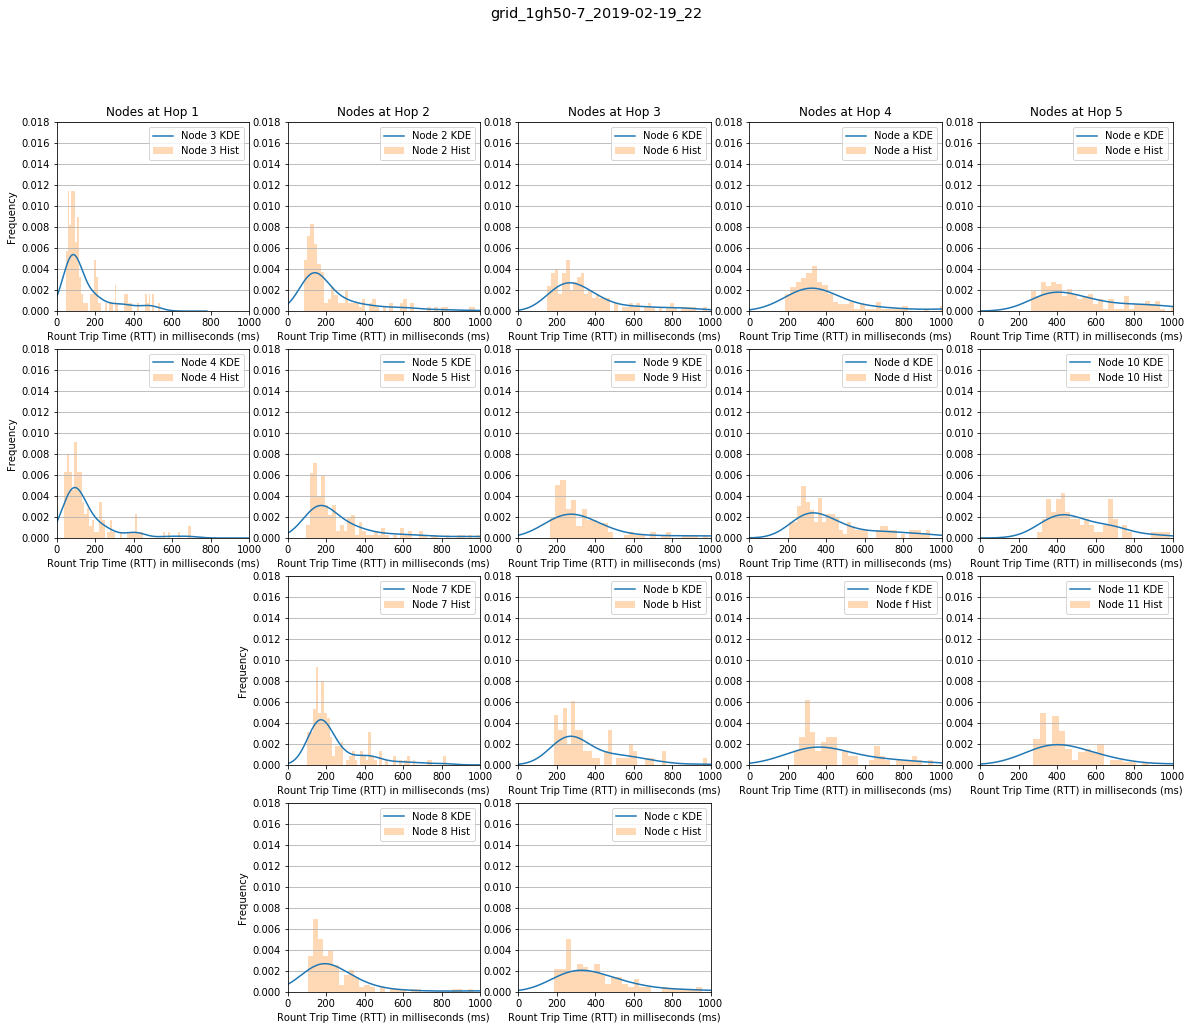

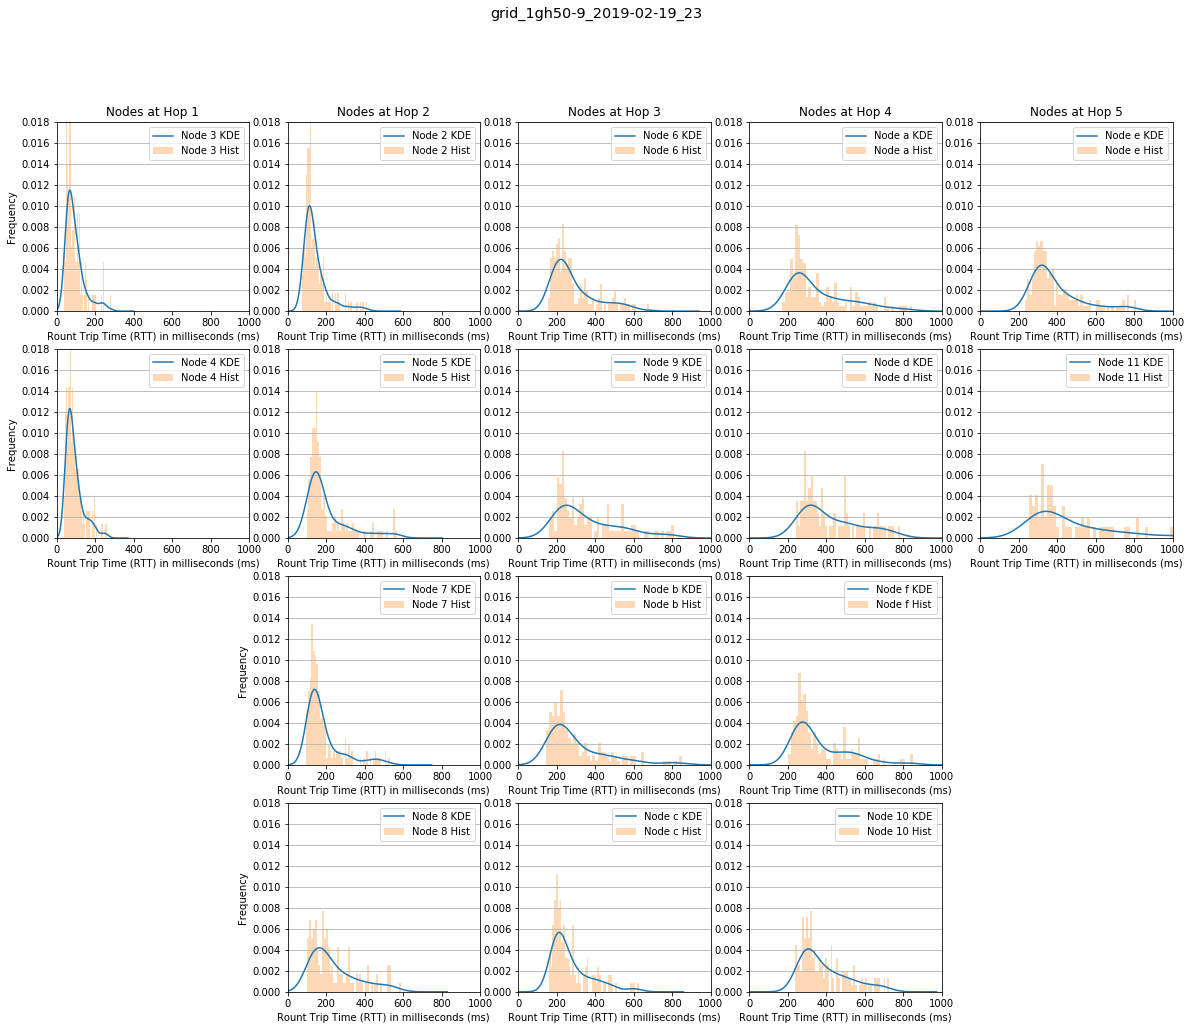

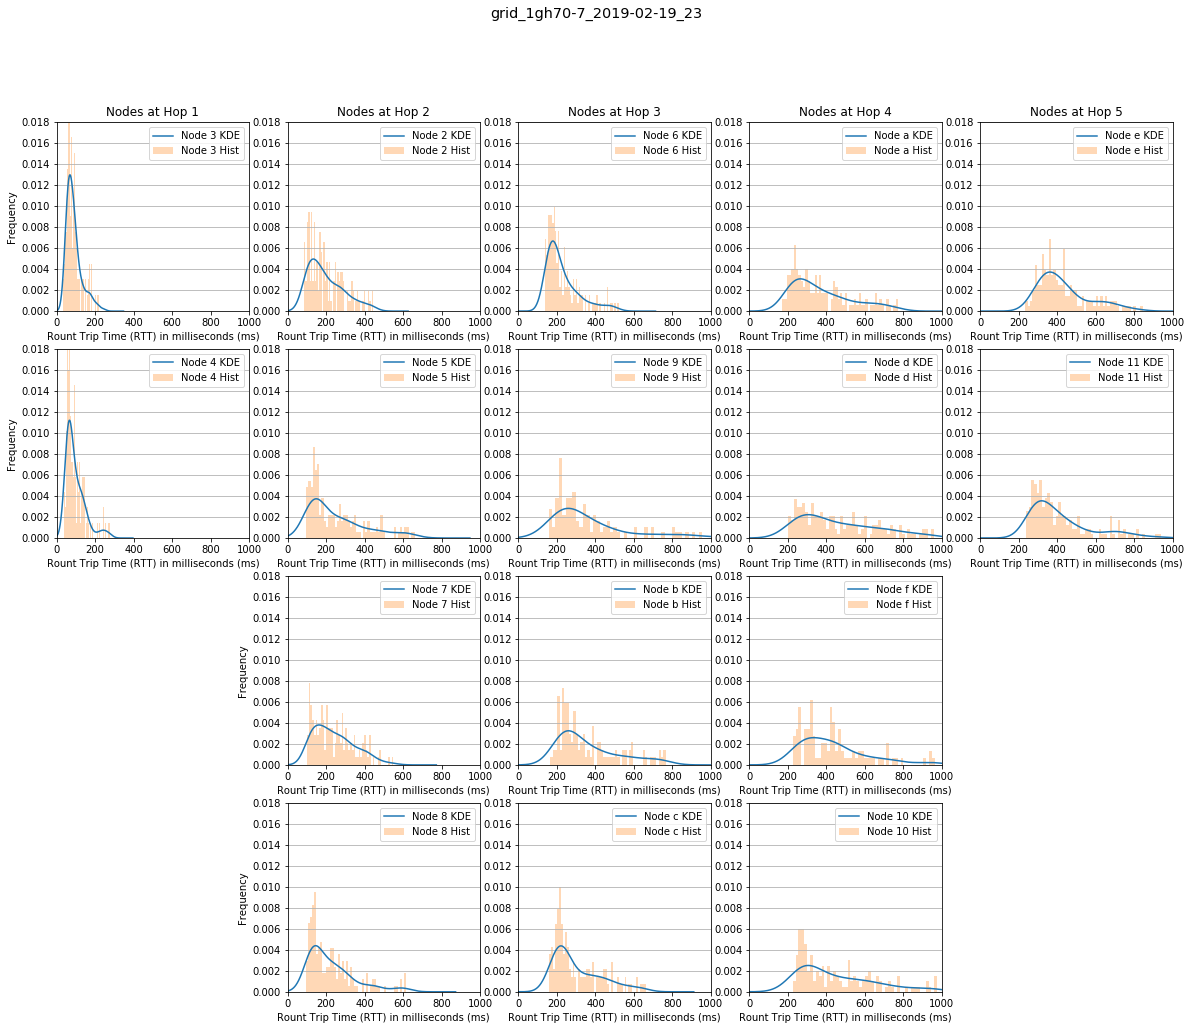

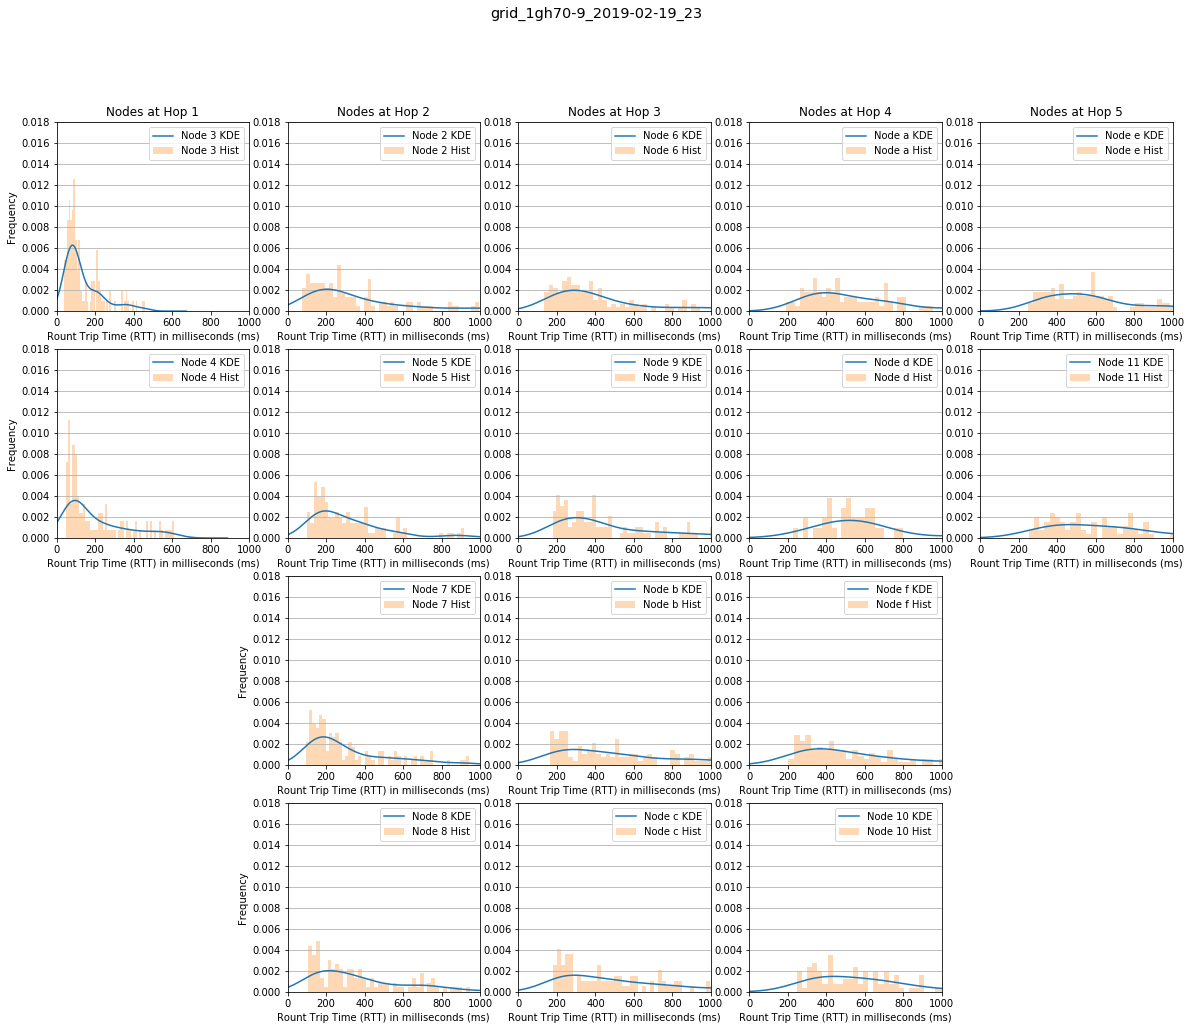

In [2]:
plots = [("traces/normal/", 'grid_normal_2019-02-19_21'),
         ("traces/1bh-7/", 'grid_1bh-7_2019-02-19_22'),
         ("traces/1bh-9/", 'grid_1bh-9_2019-02-20_00'),
         ("traces/1gh30-7/", 'grid_1gh30-7_2019-02-19_22'),
         ("traces/1gh30-9/", 'grid_1gh30-9_2019-02-20_00'),
         ("traces/1gh50-7/", 'grid_1gh50-7_2019-02-19_22'),
         ("traces/1gh50-9/", 'grid_1gh50-9_2019-02-19_23'),
         ("traces/1gh70-7/", 'grid_1gh70-7_2019-02-19_23'),
         ("traces/1gh70-9/", 'grid_1gh70-9_2019-02-19_23')
        ]

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 1000, 0.018, row[1])

Tumbling windows

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


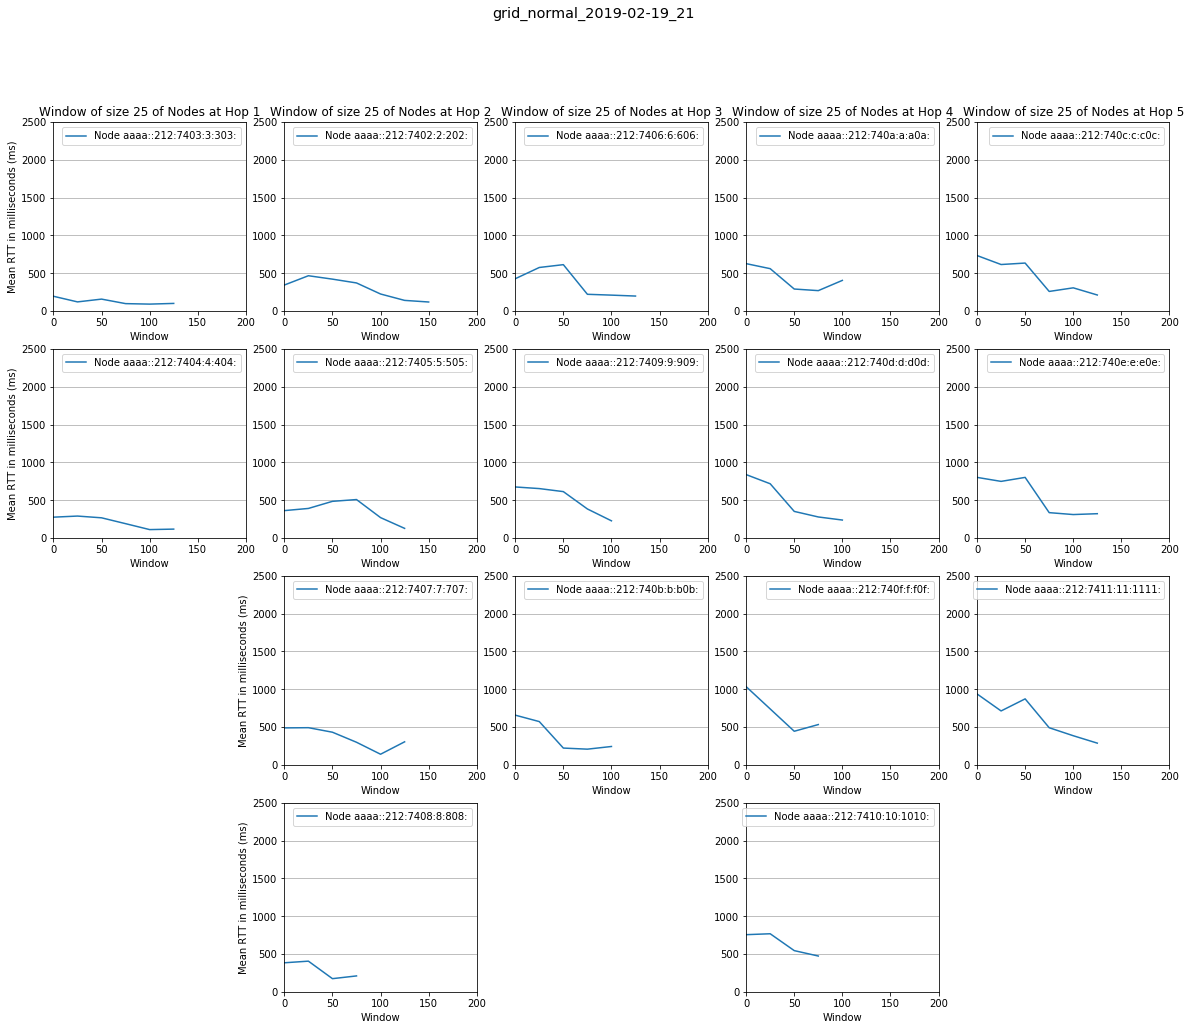

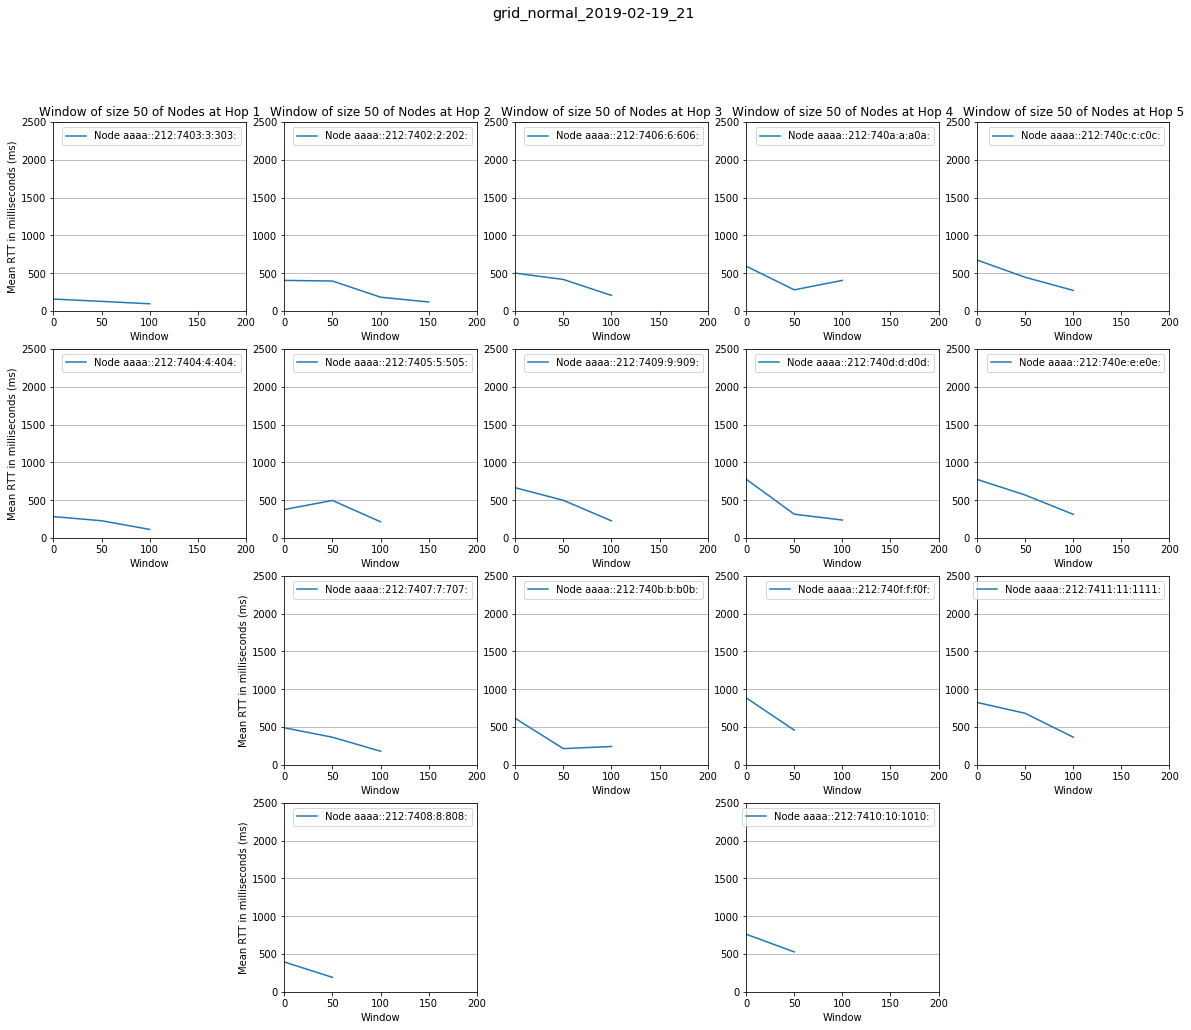

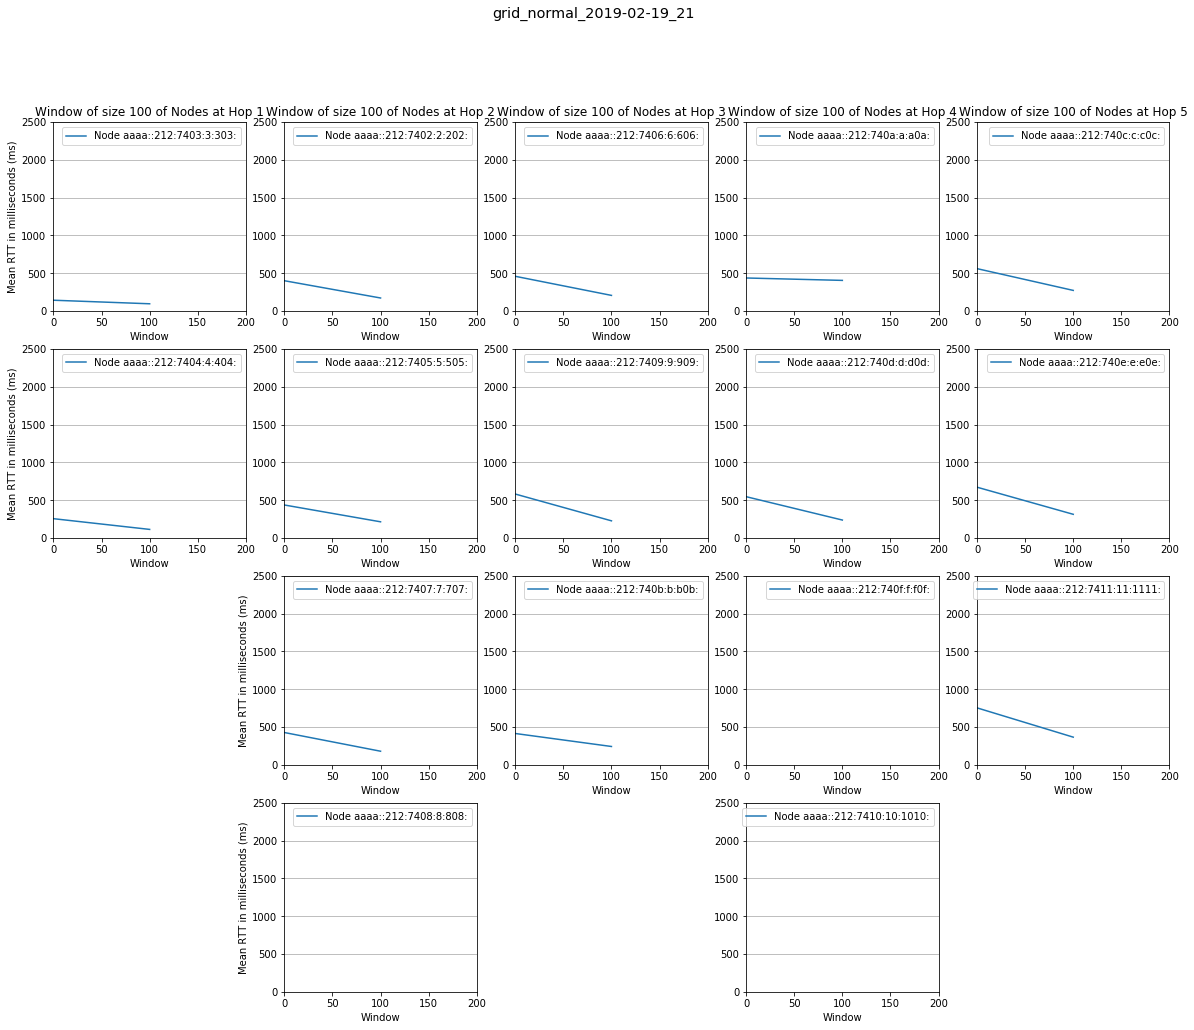

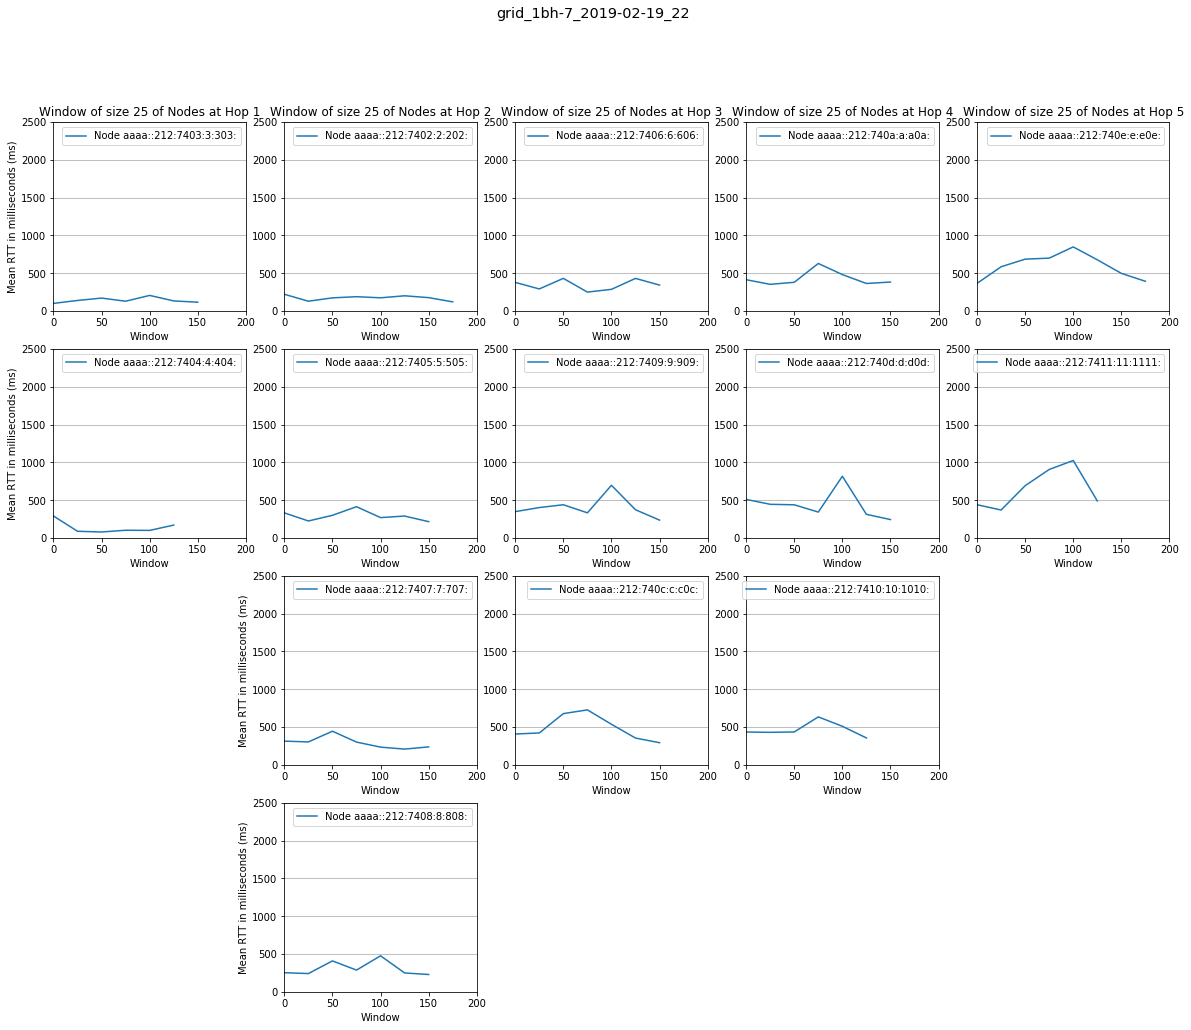

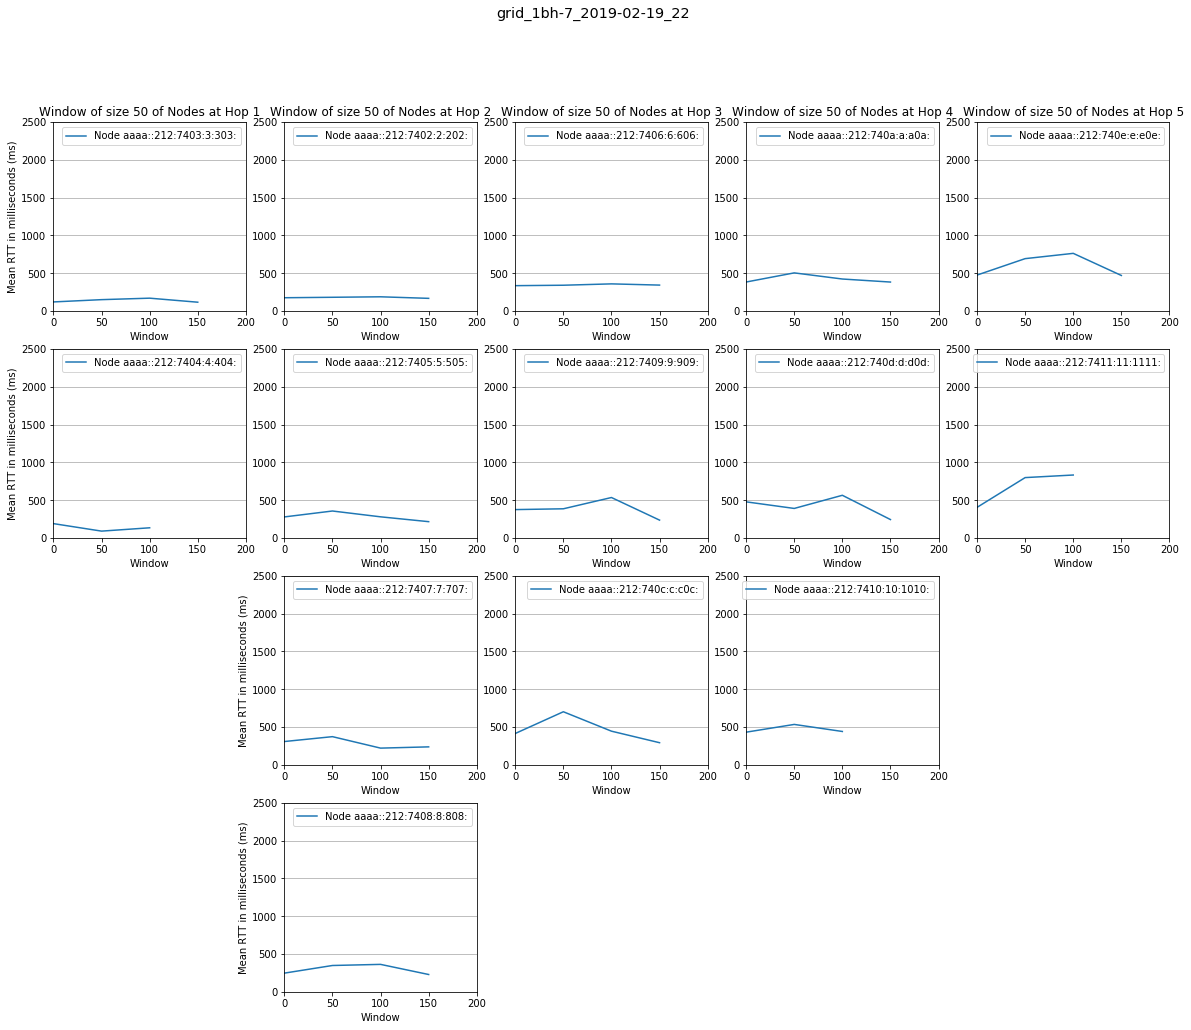

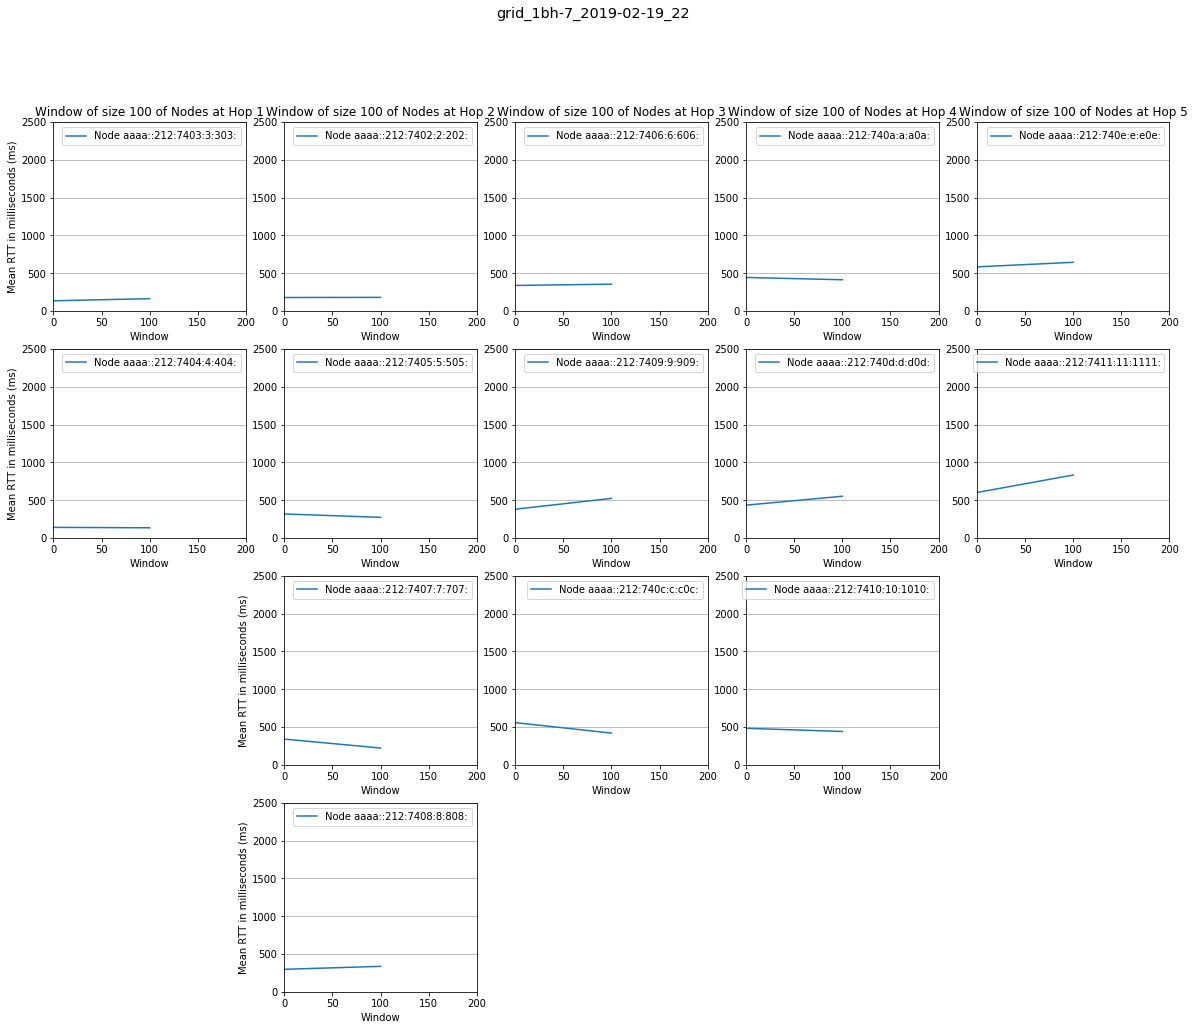

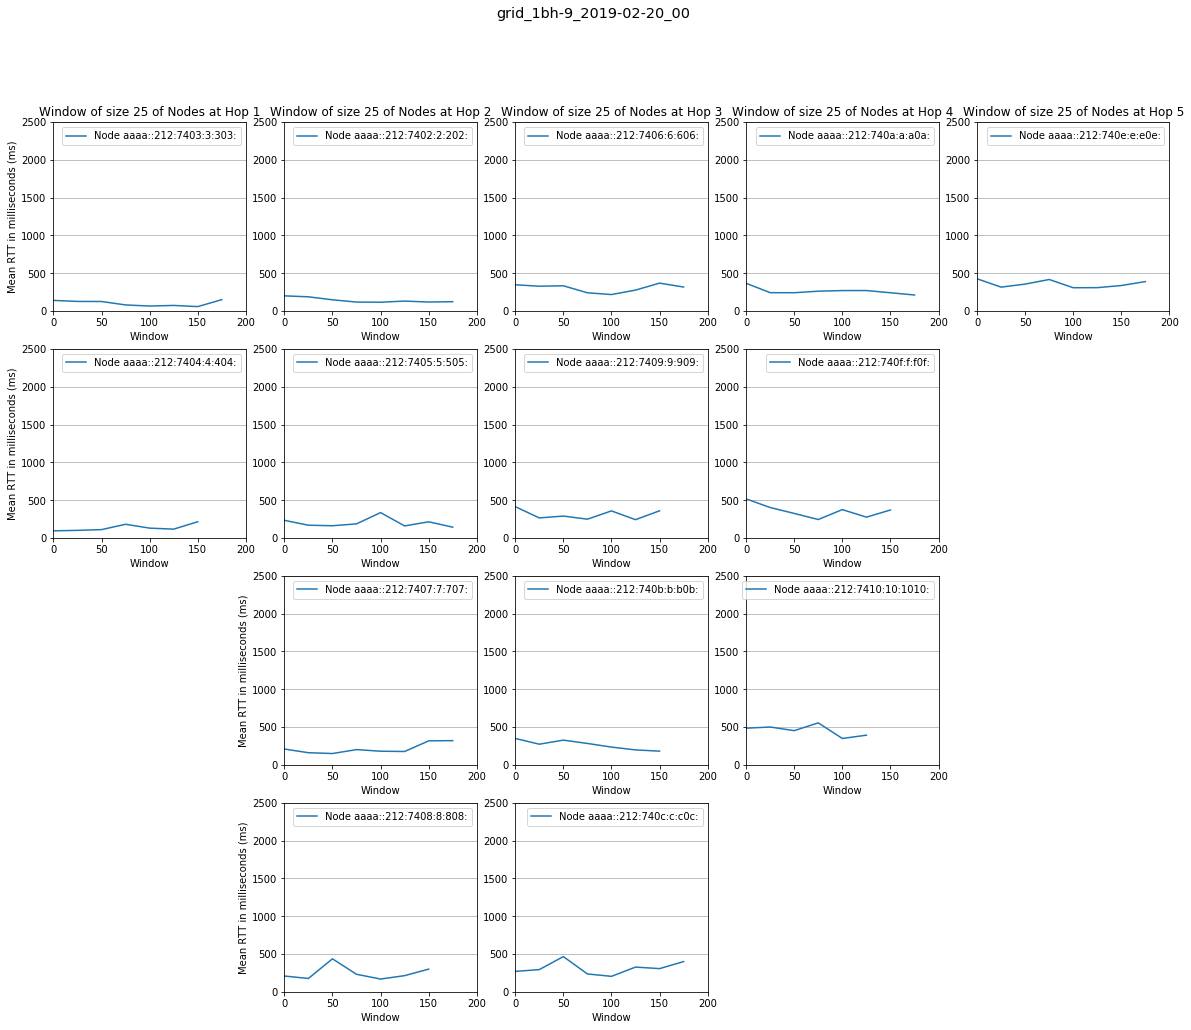

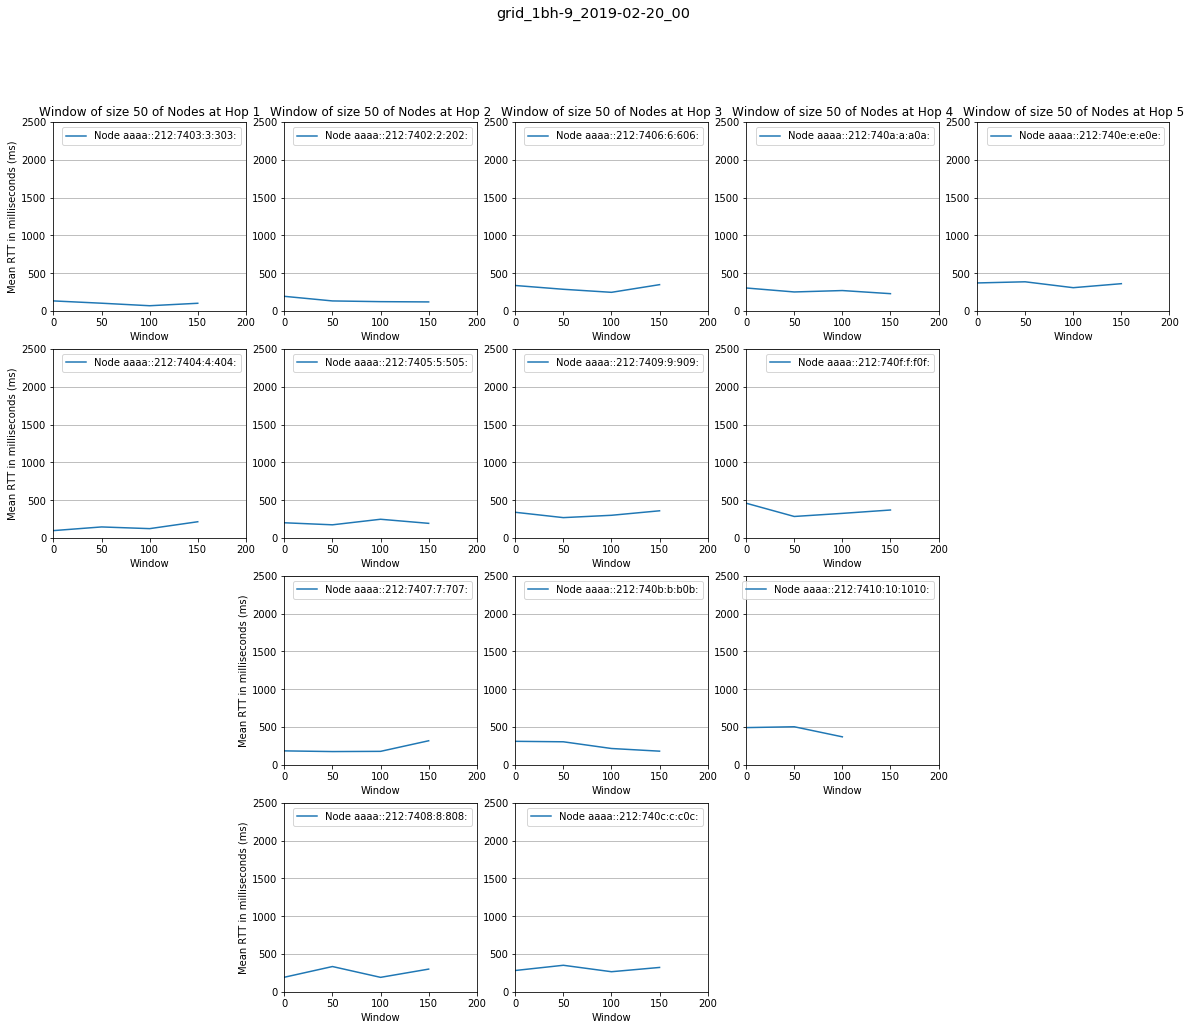

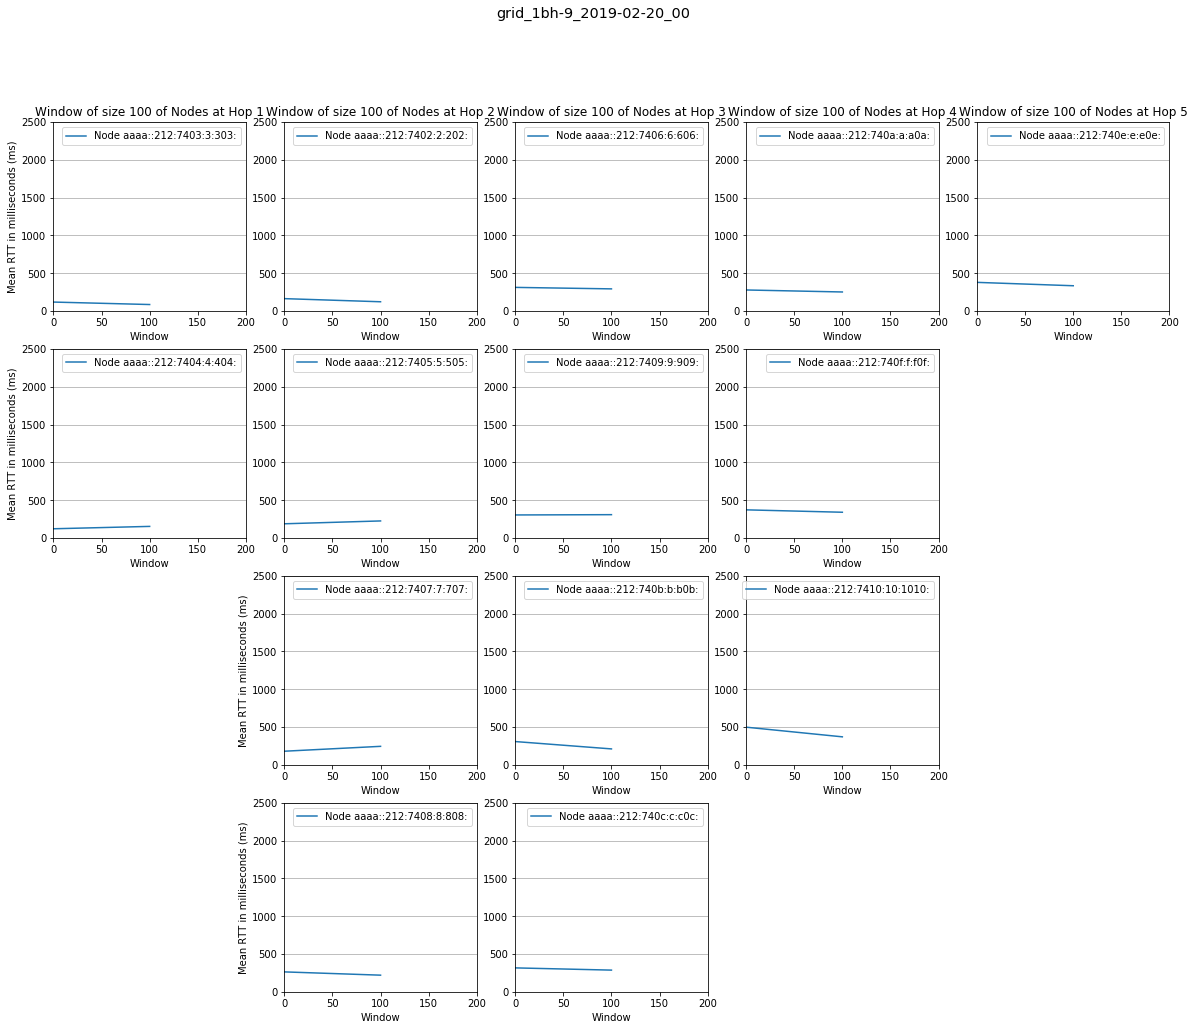

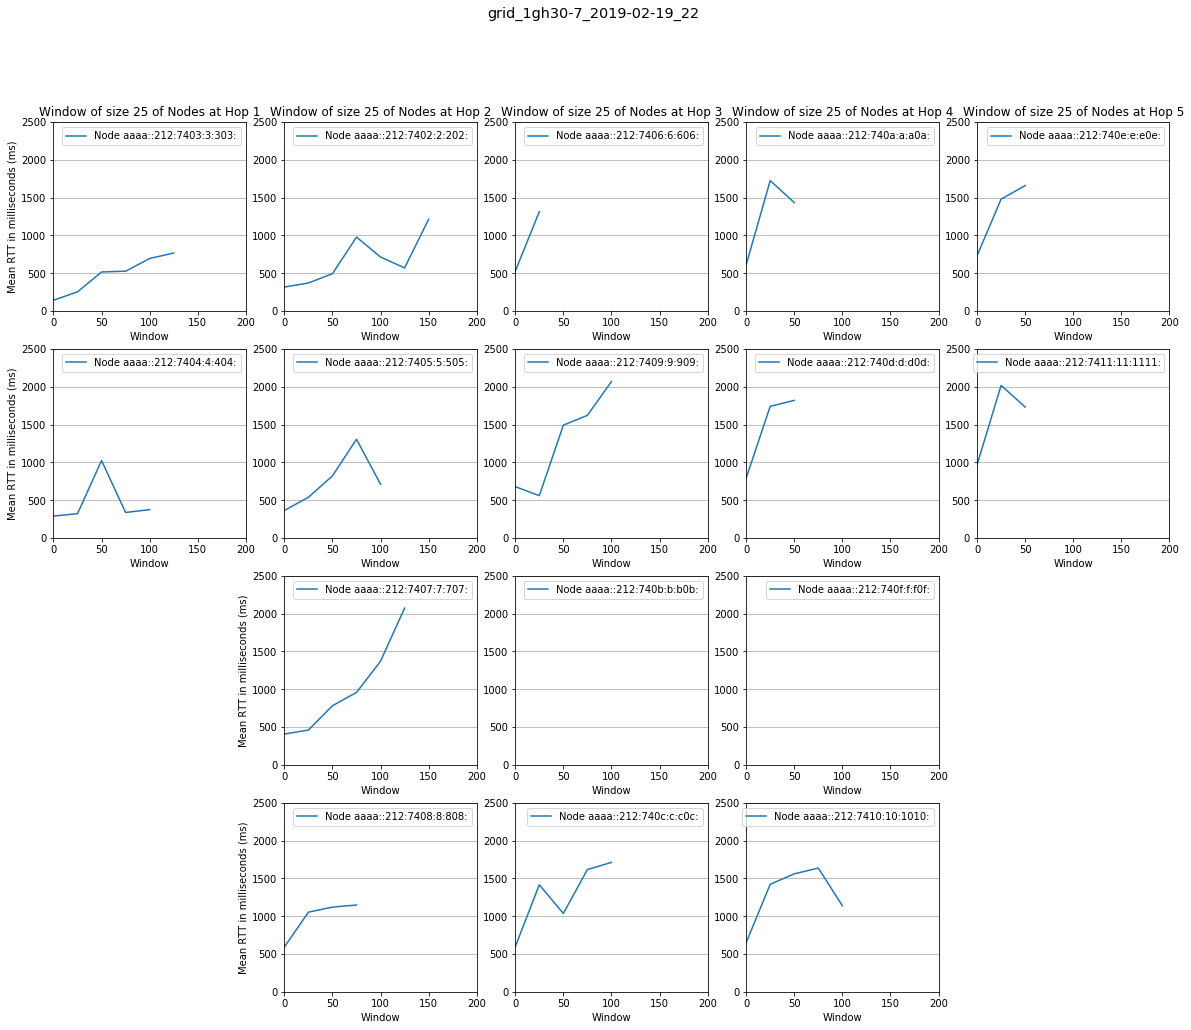

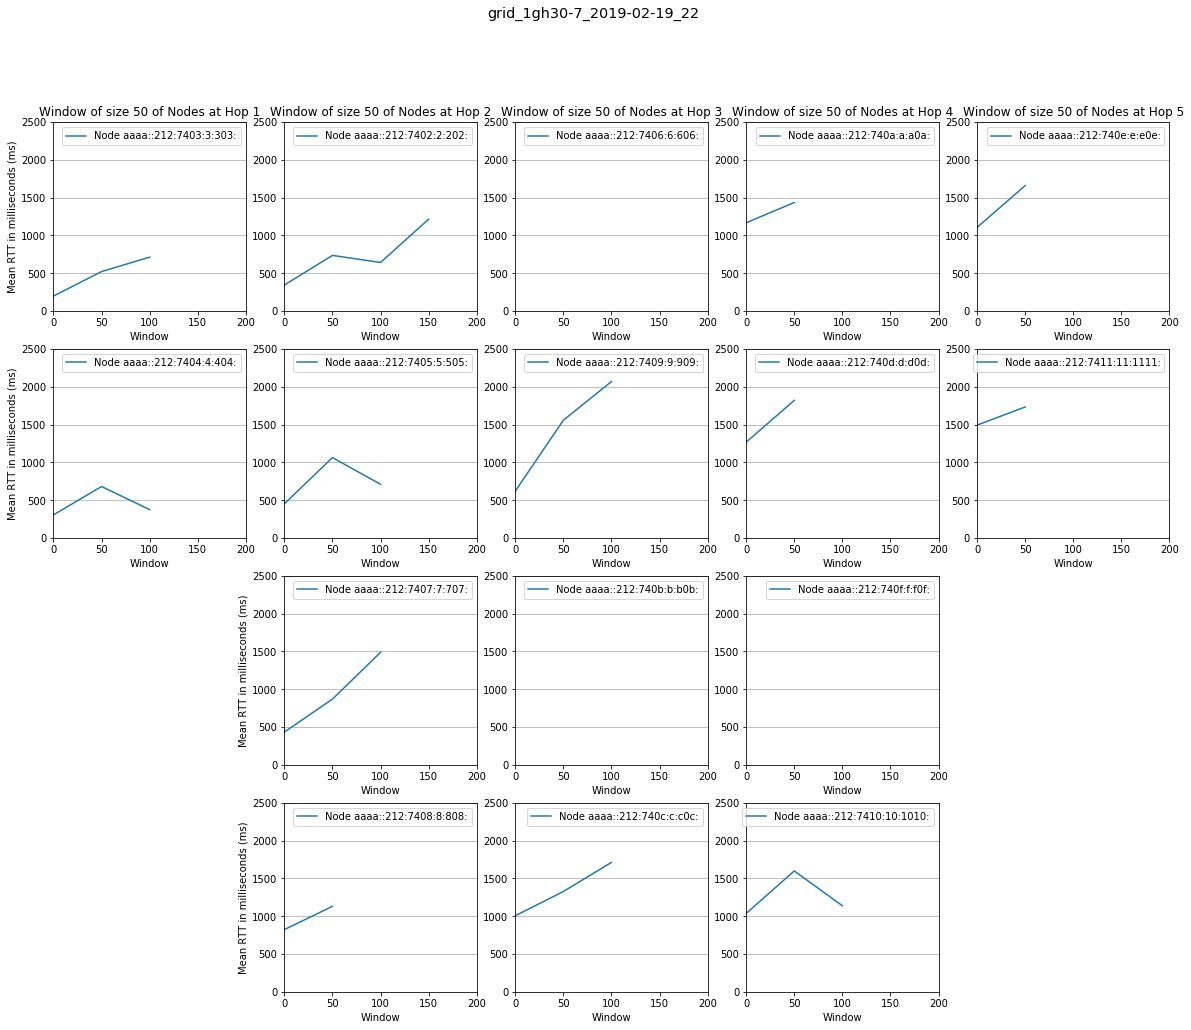

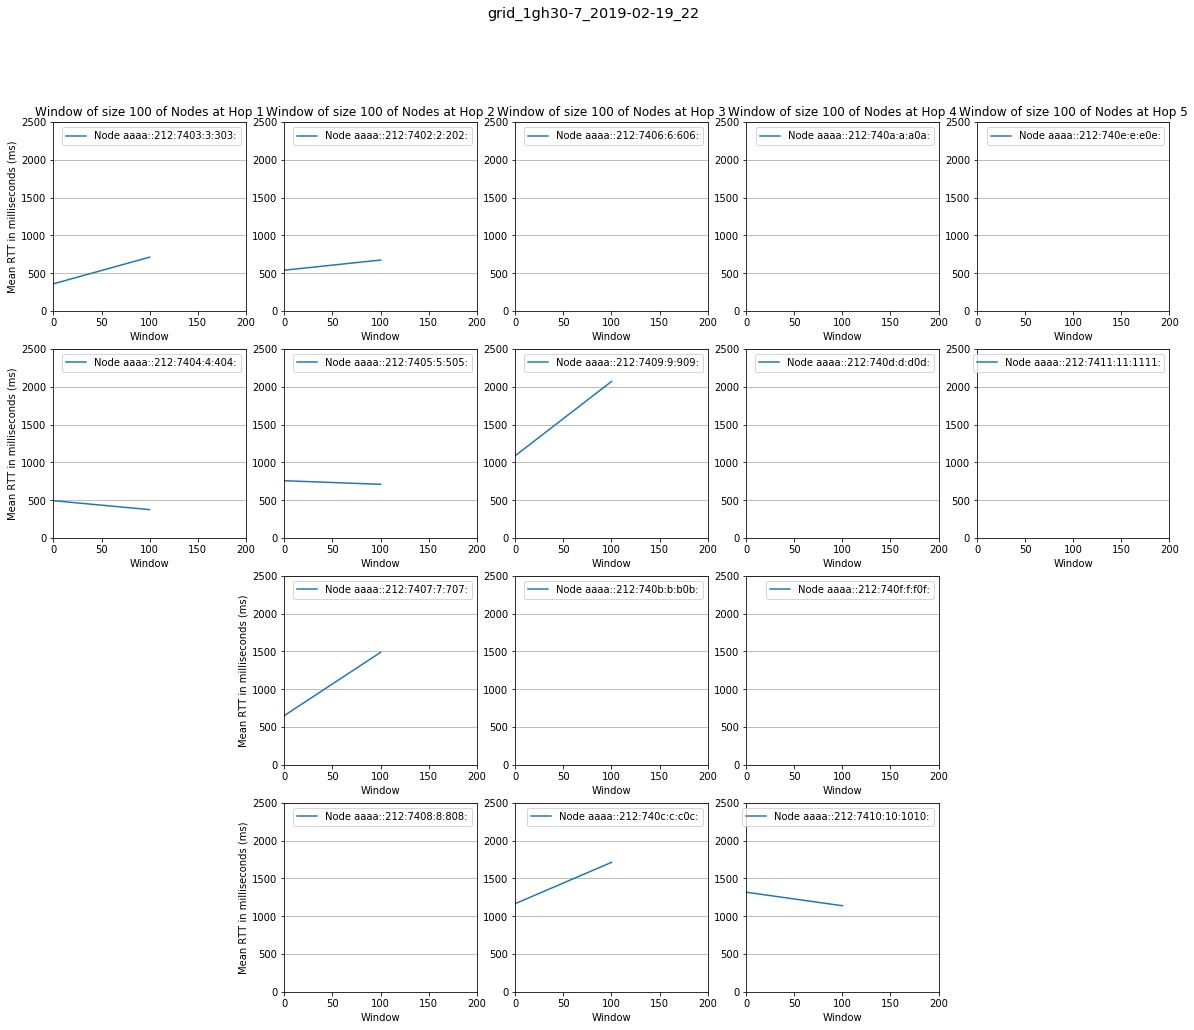

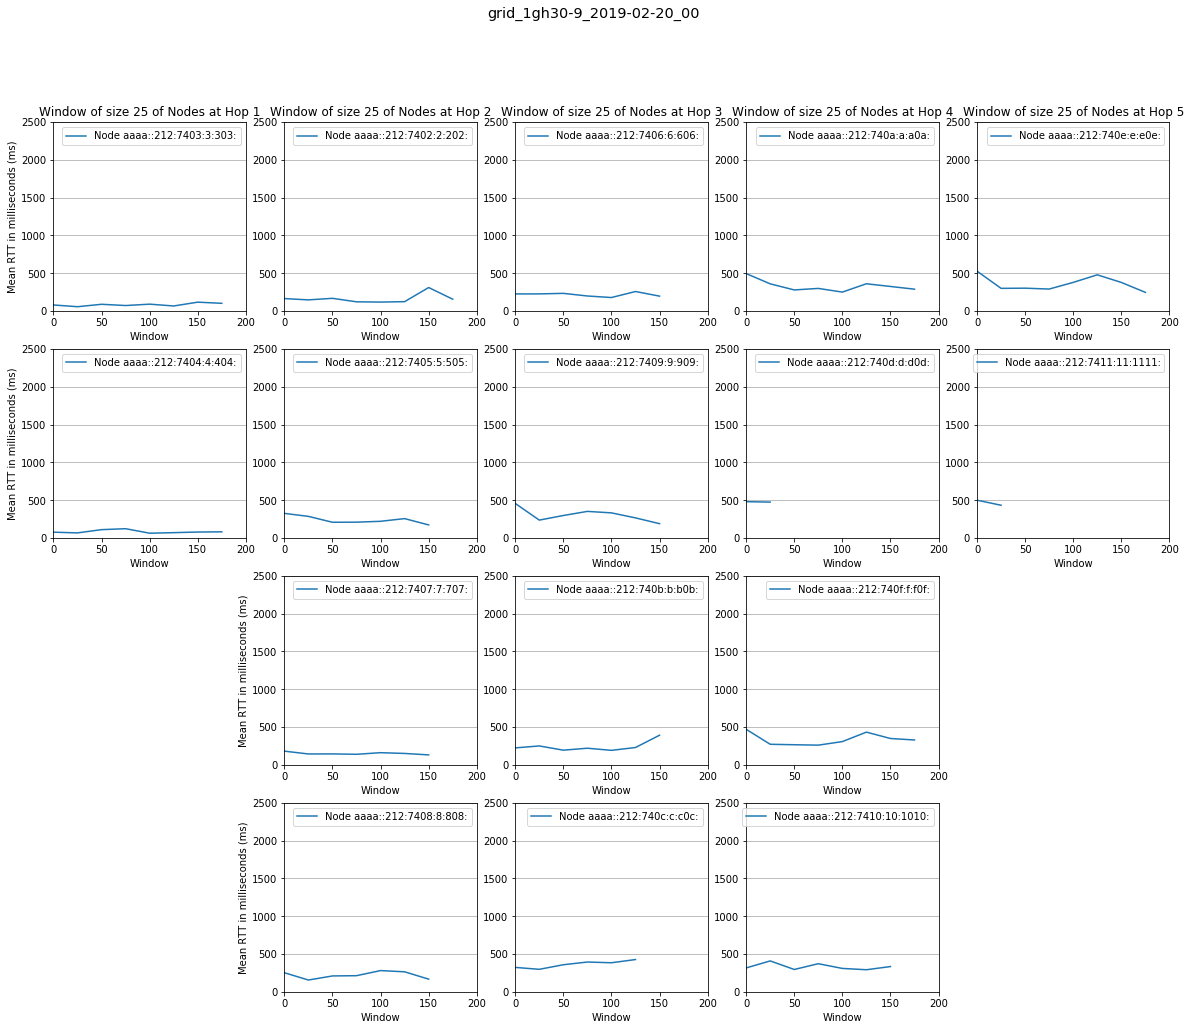

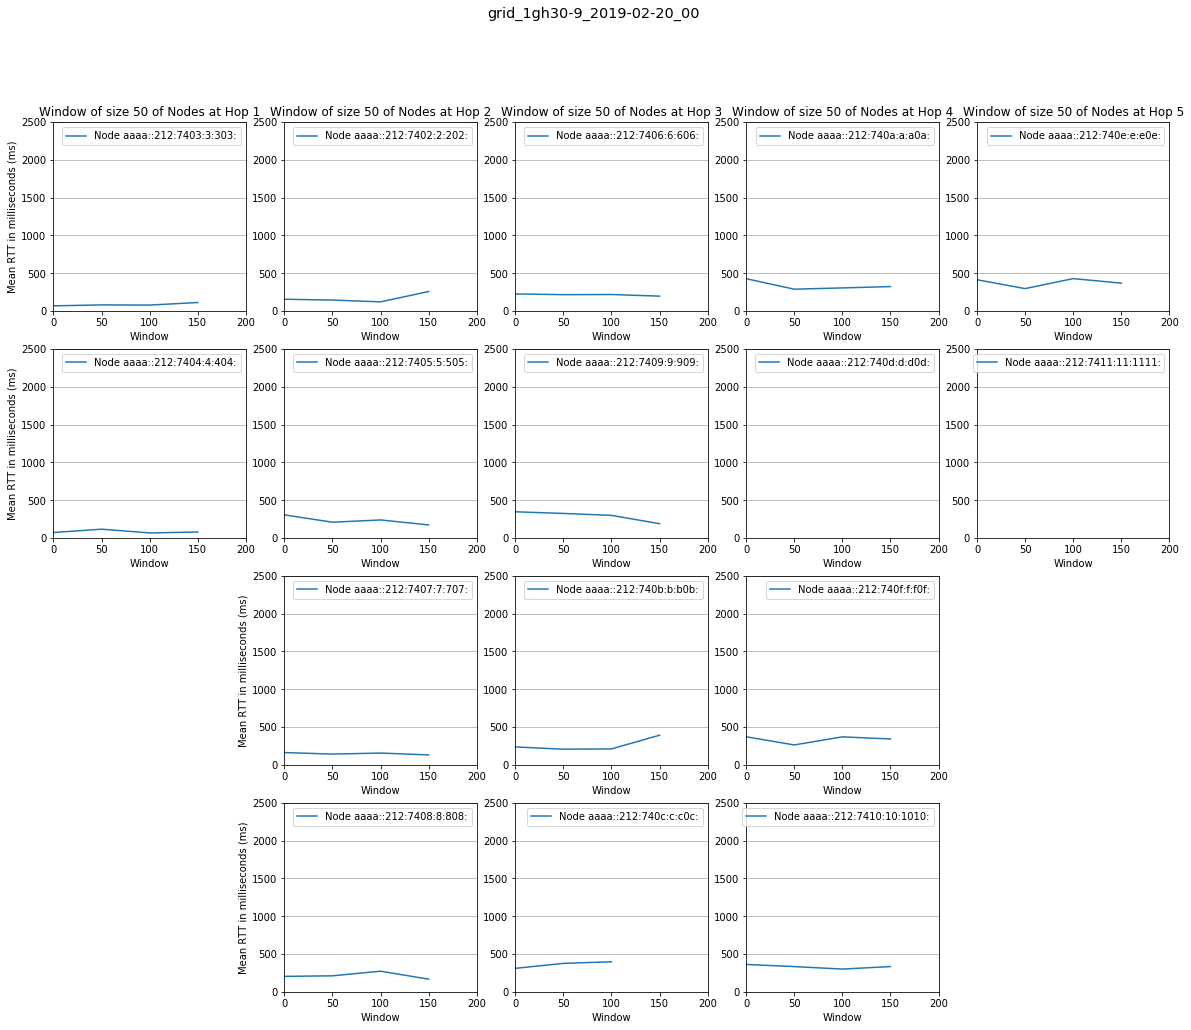

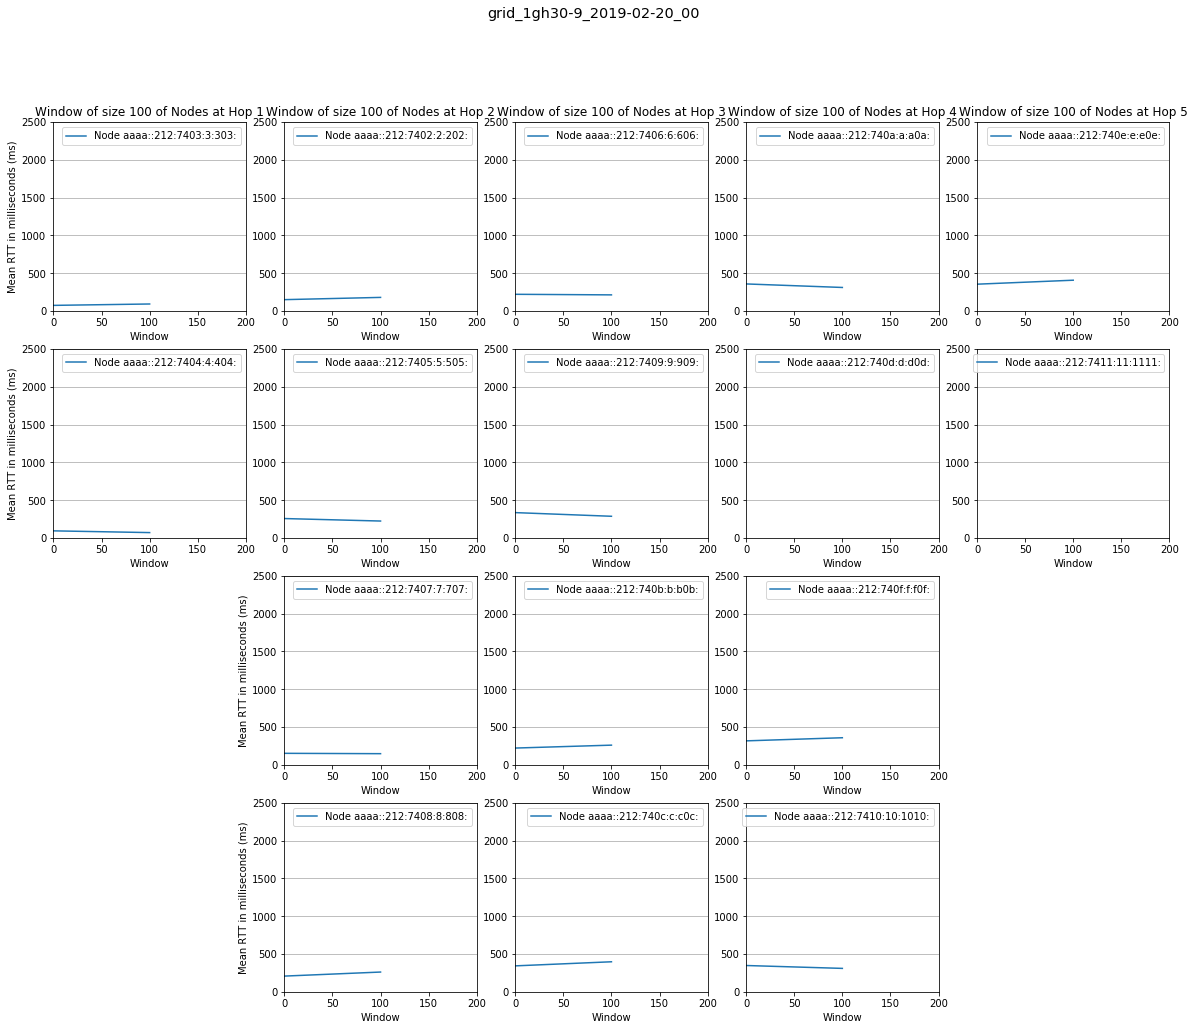

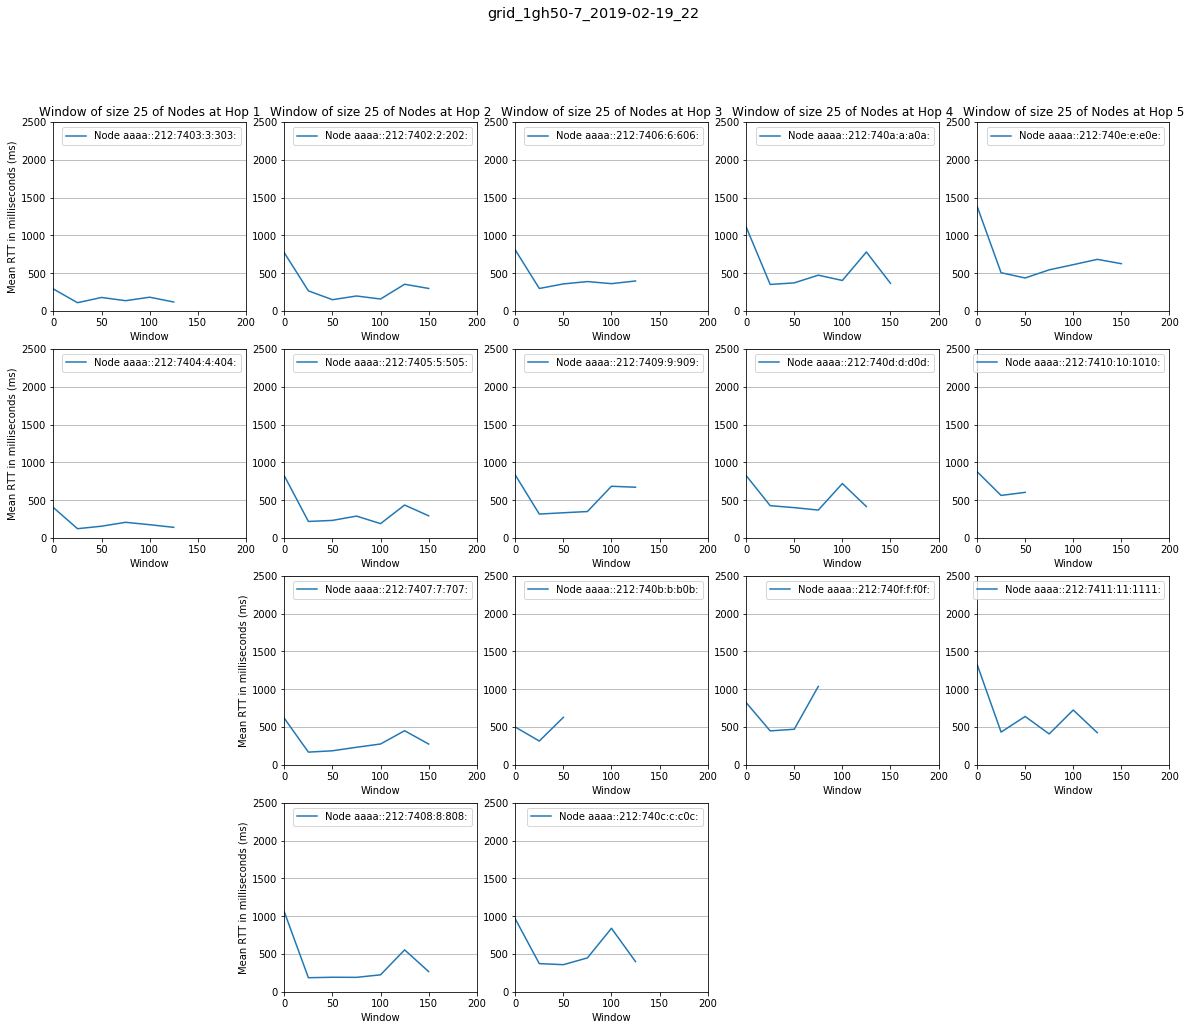

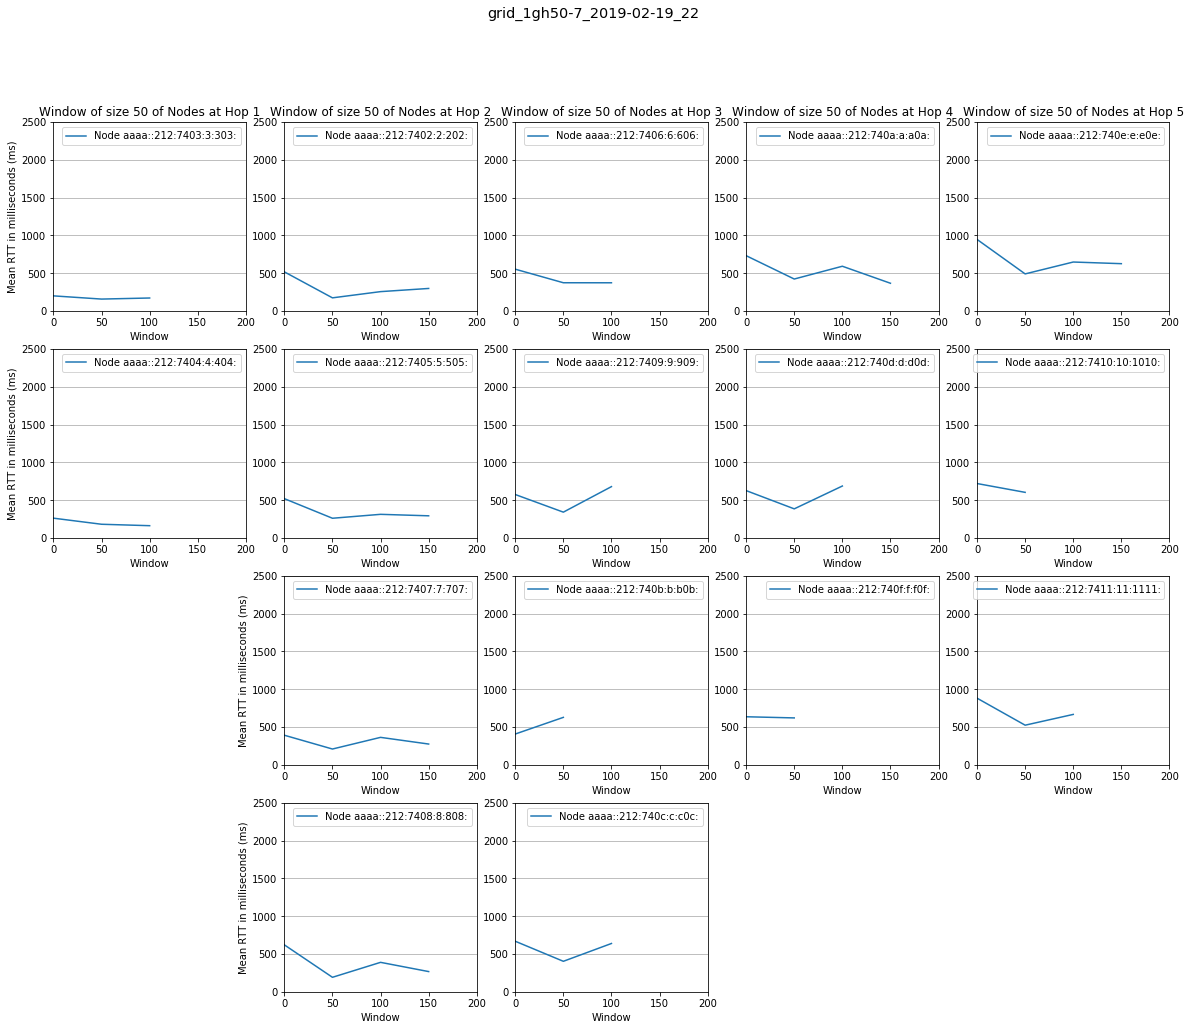

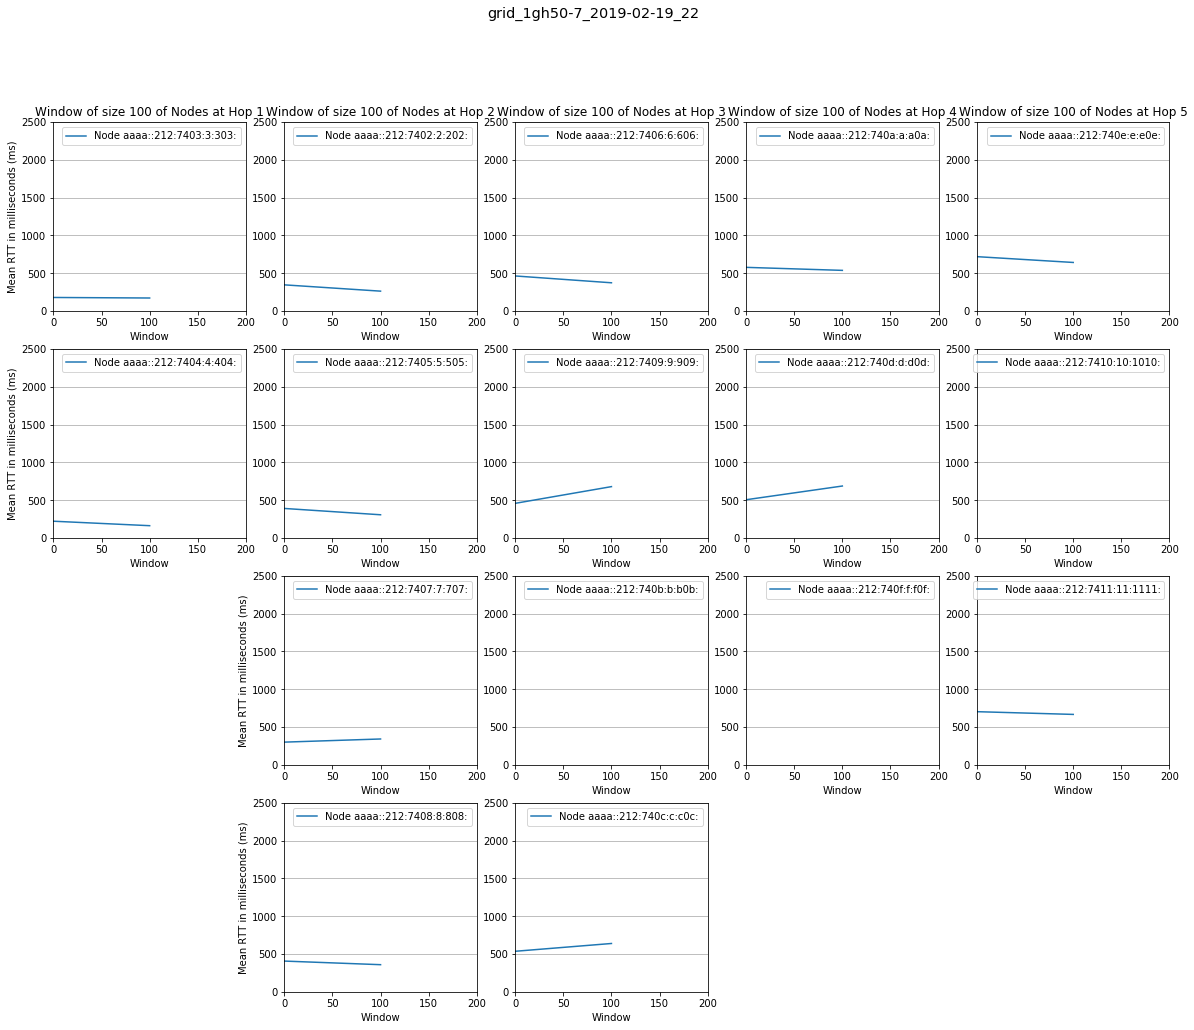

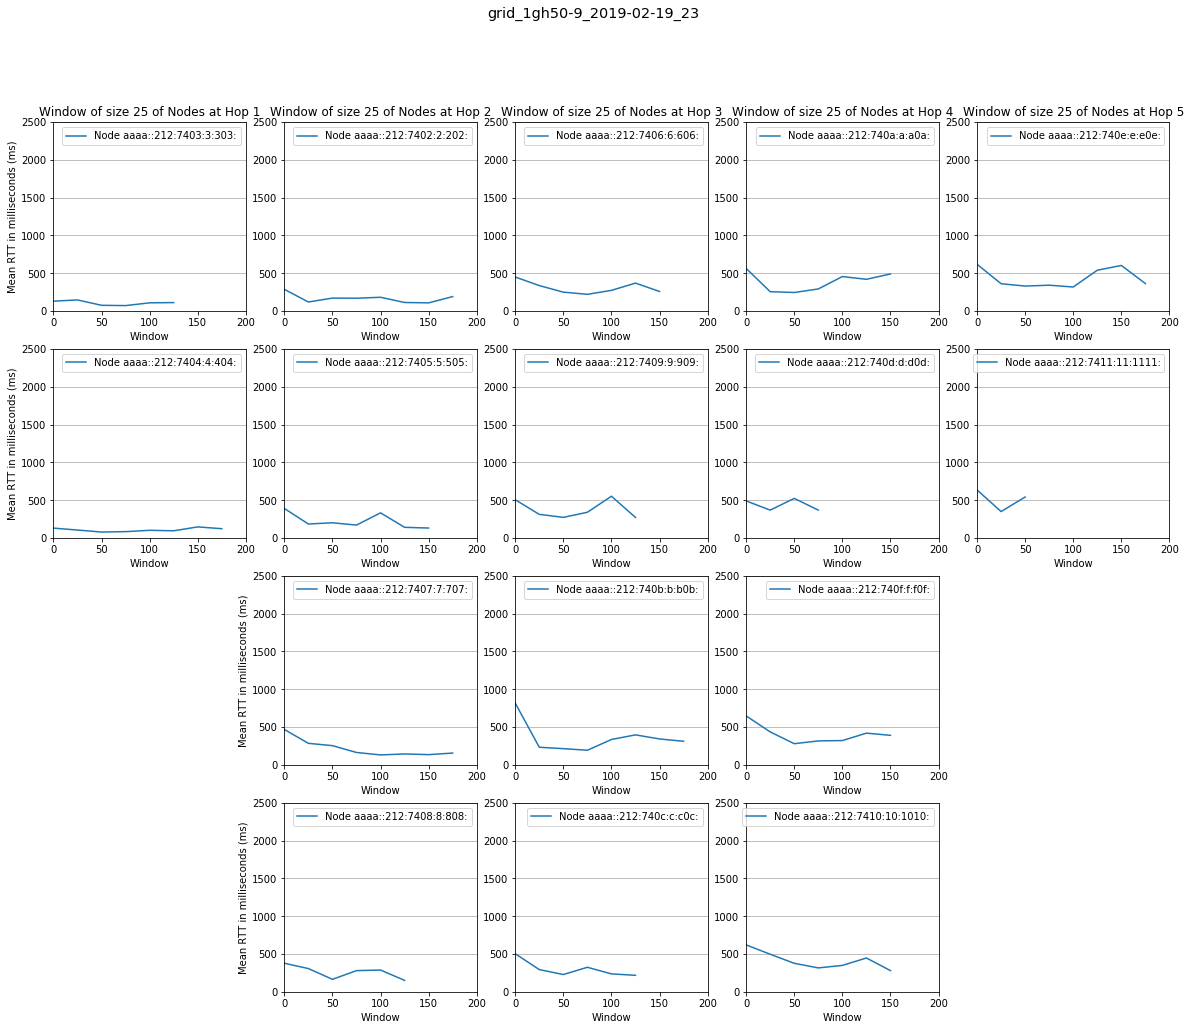

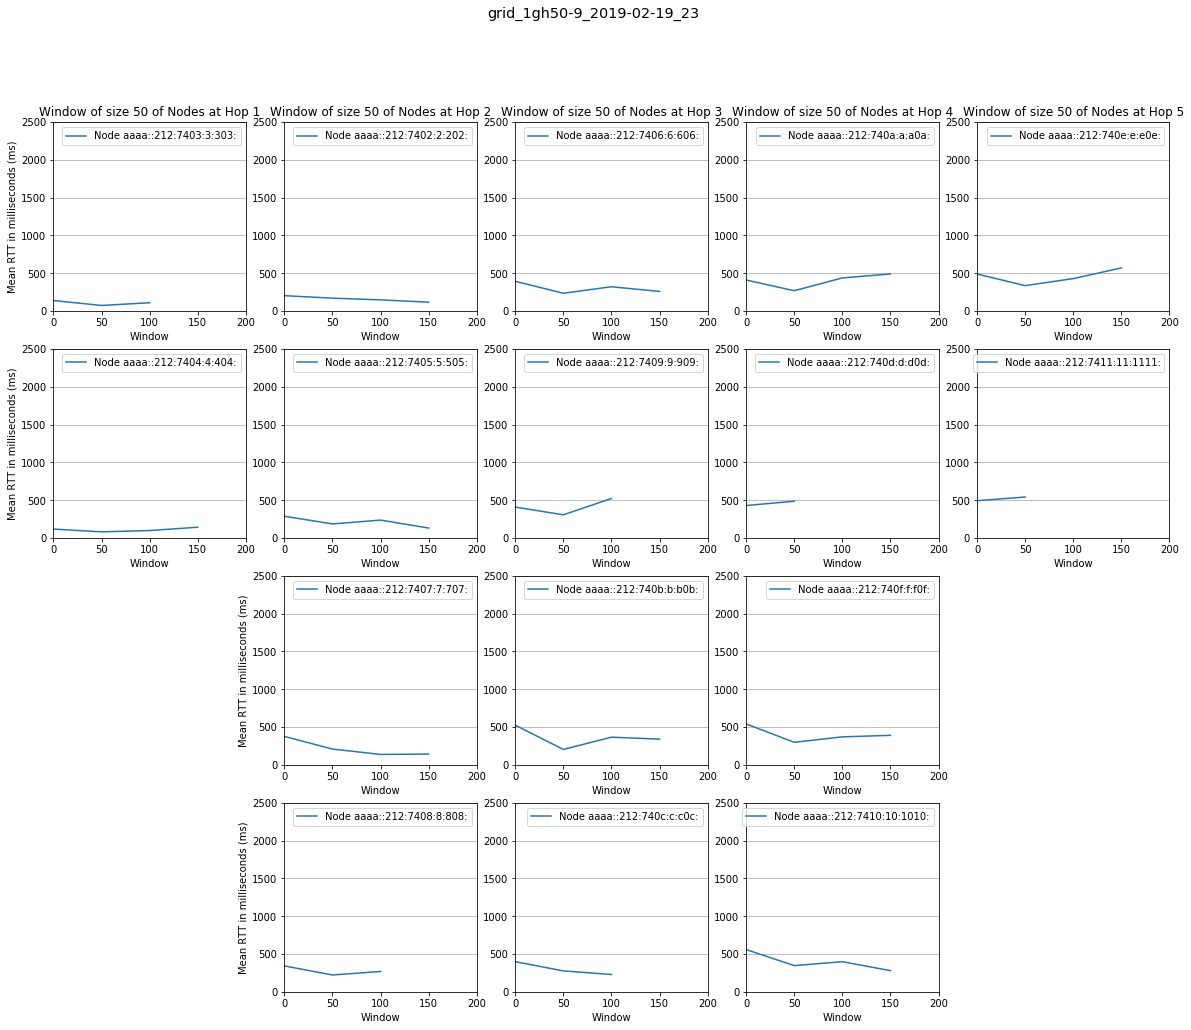

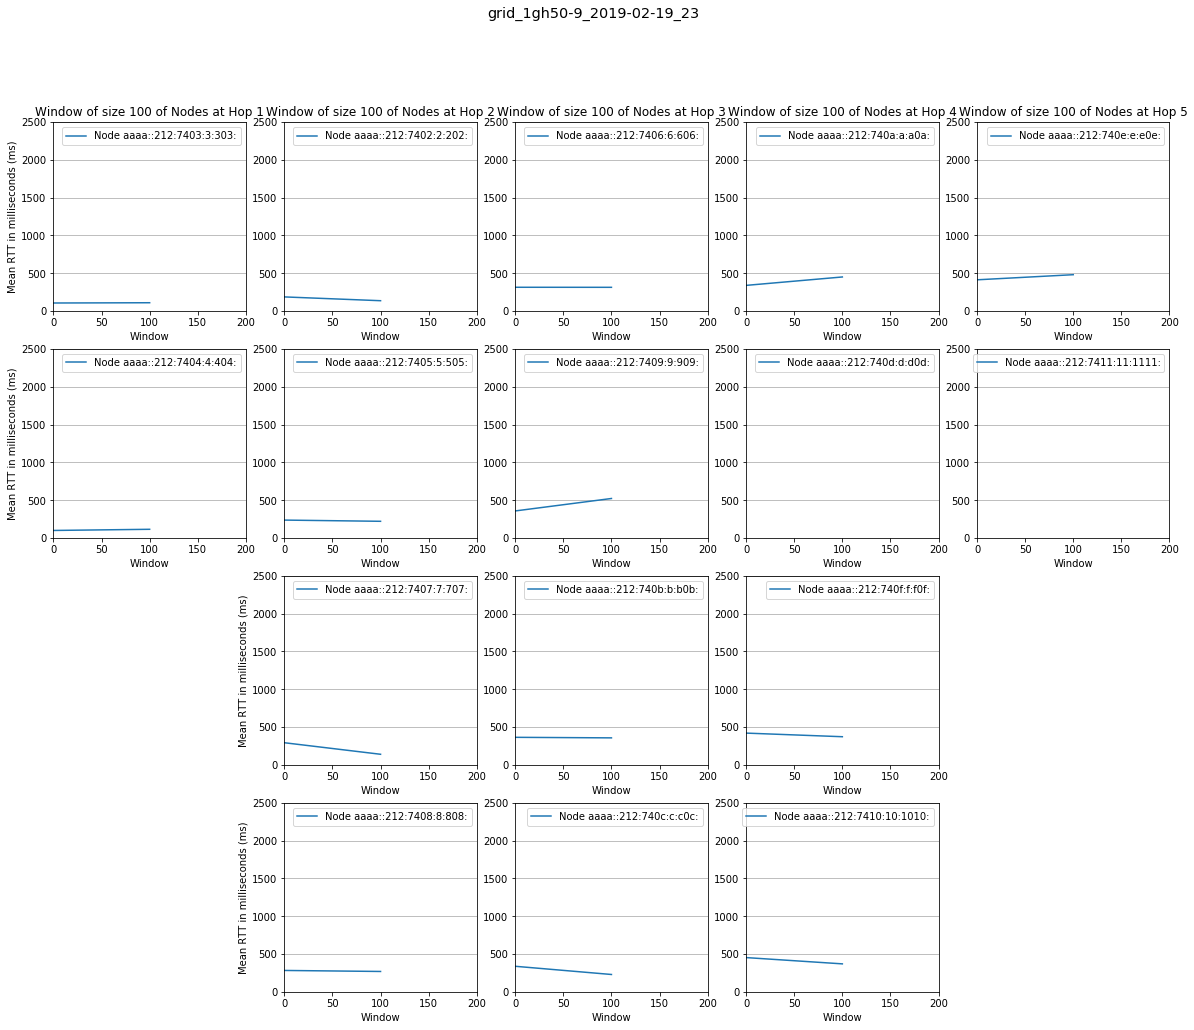

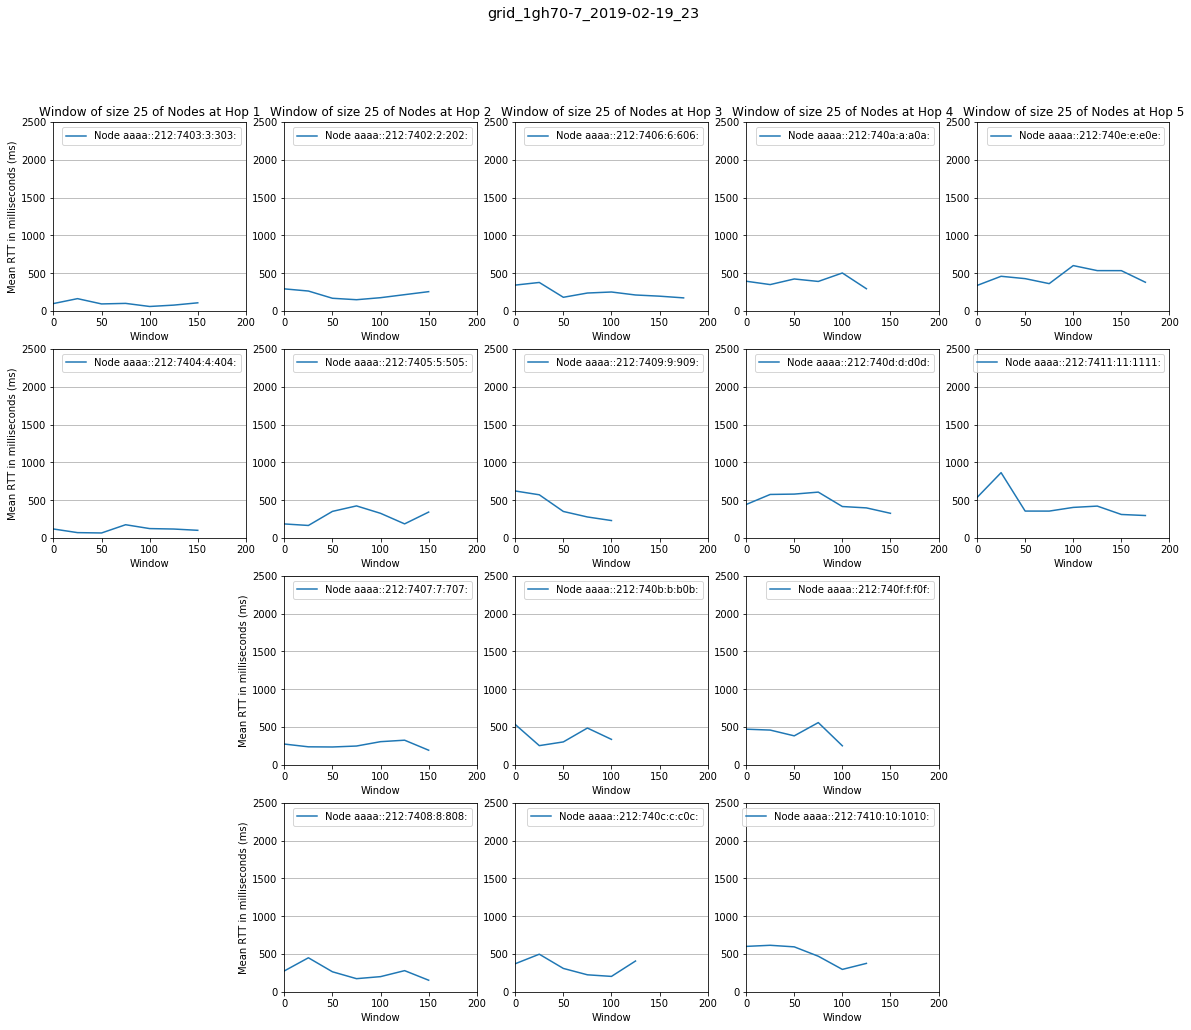

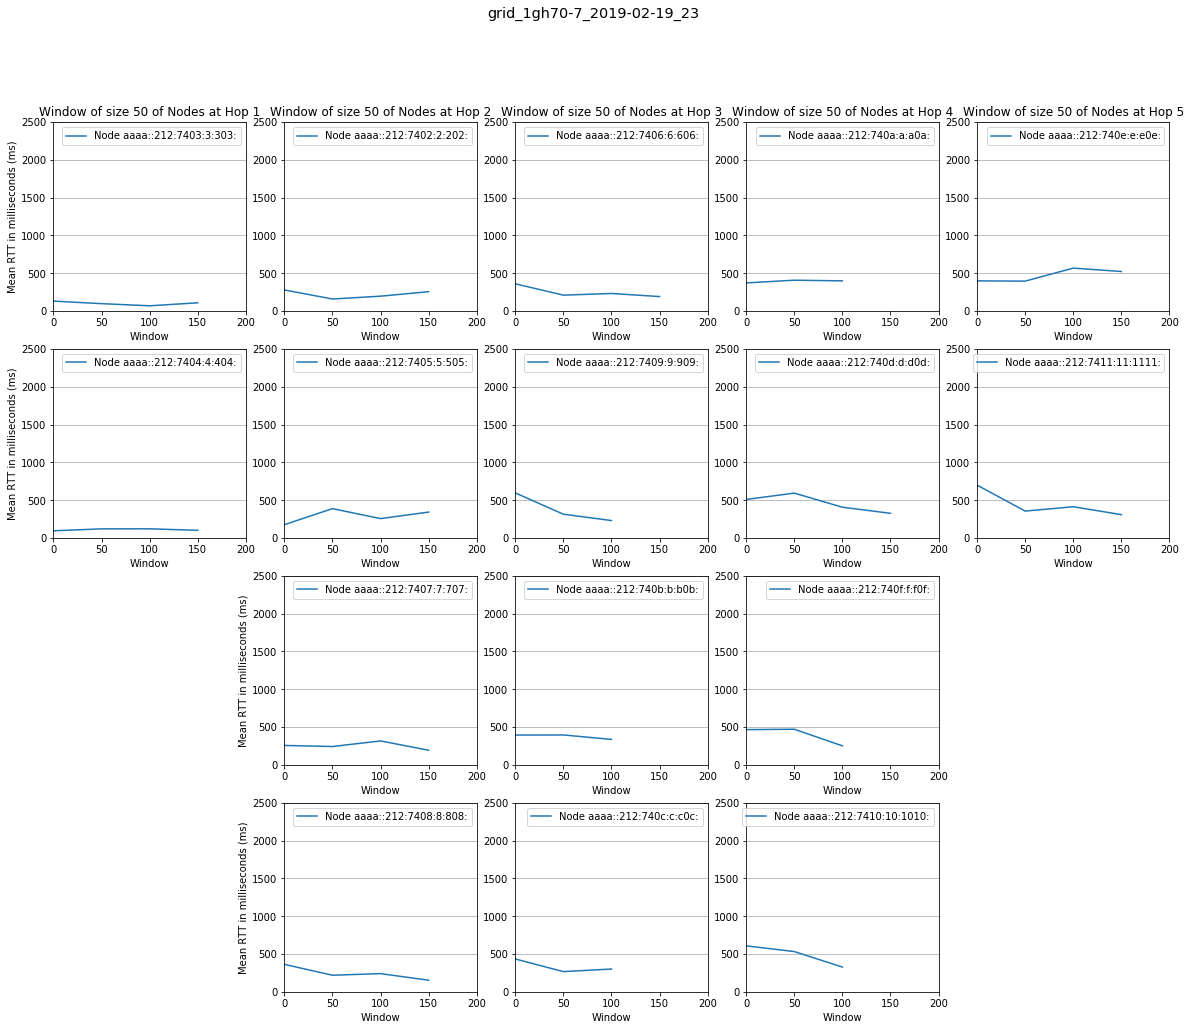

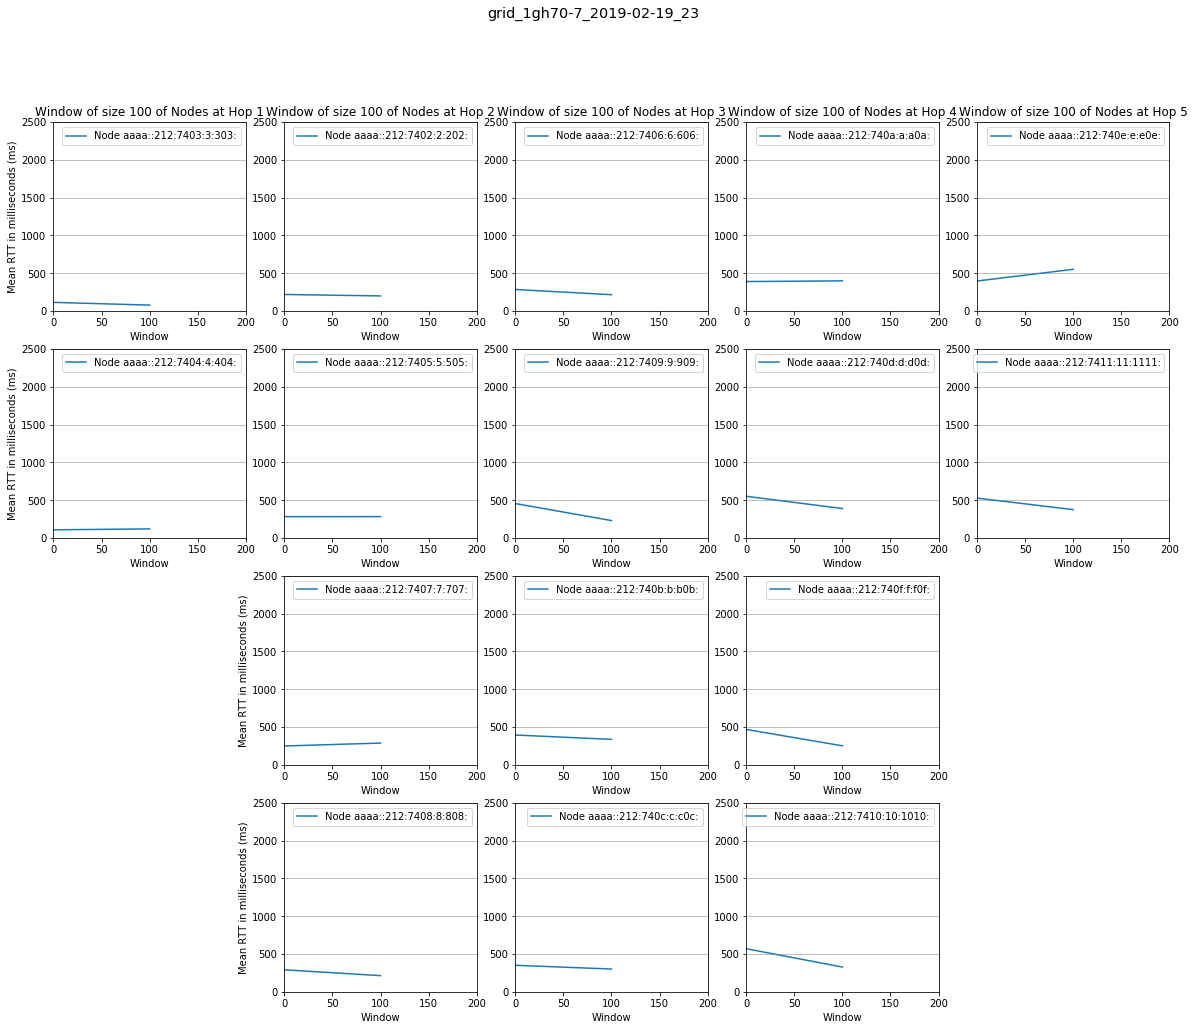

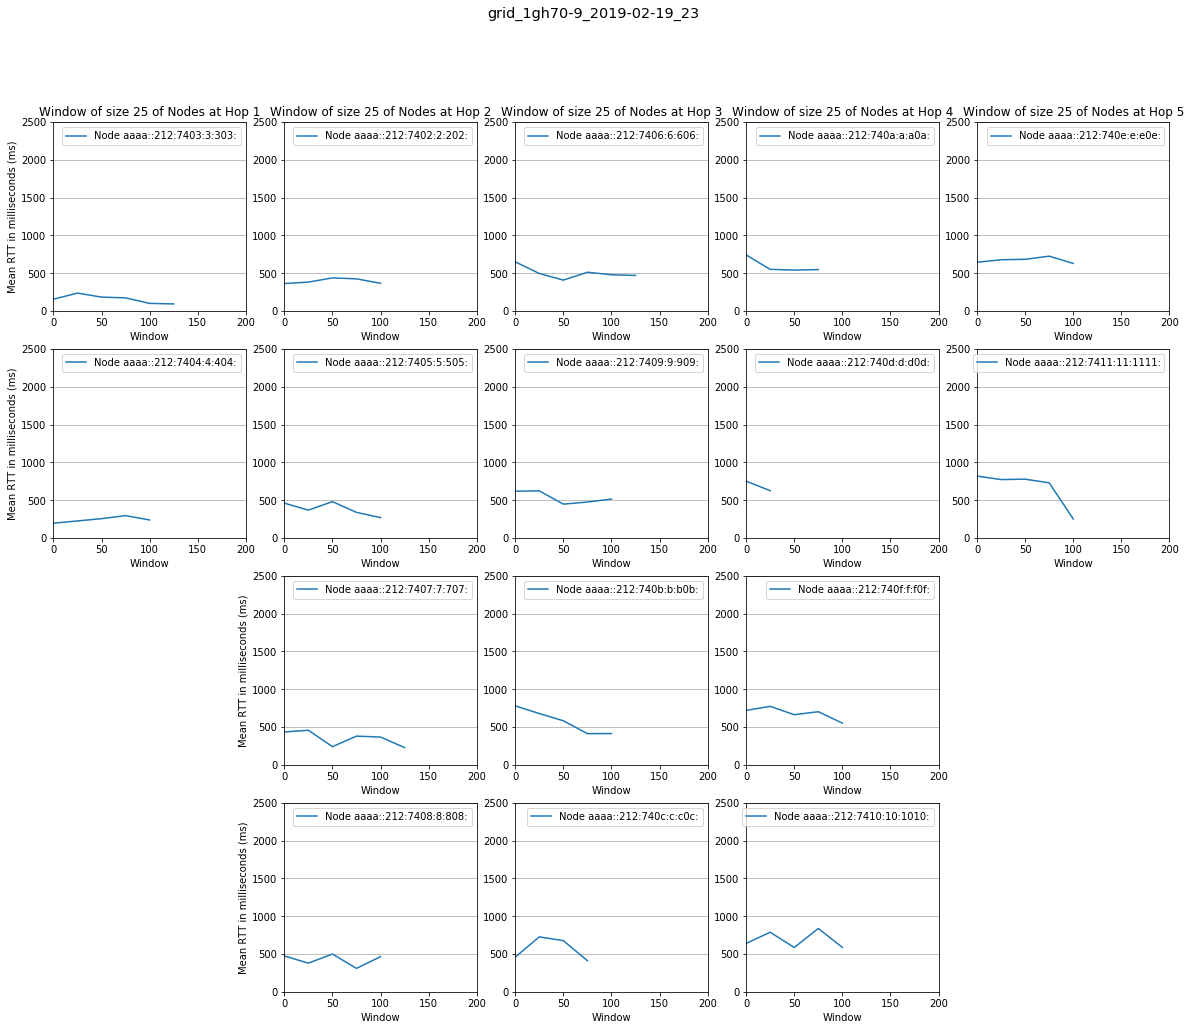

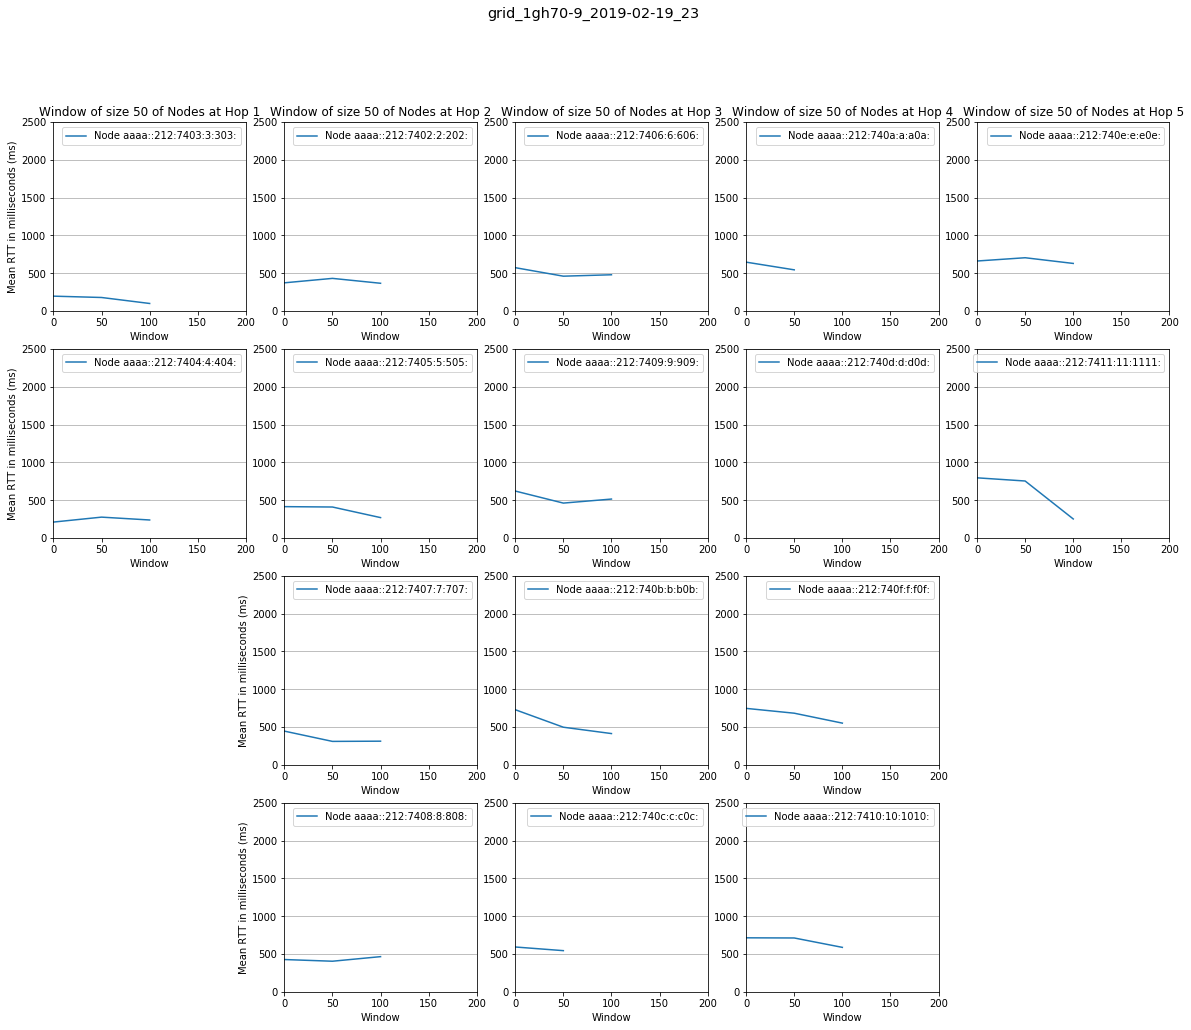

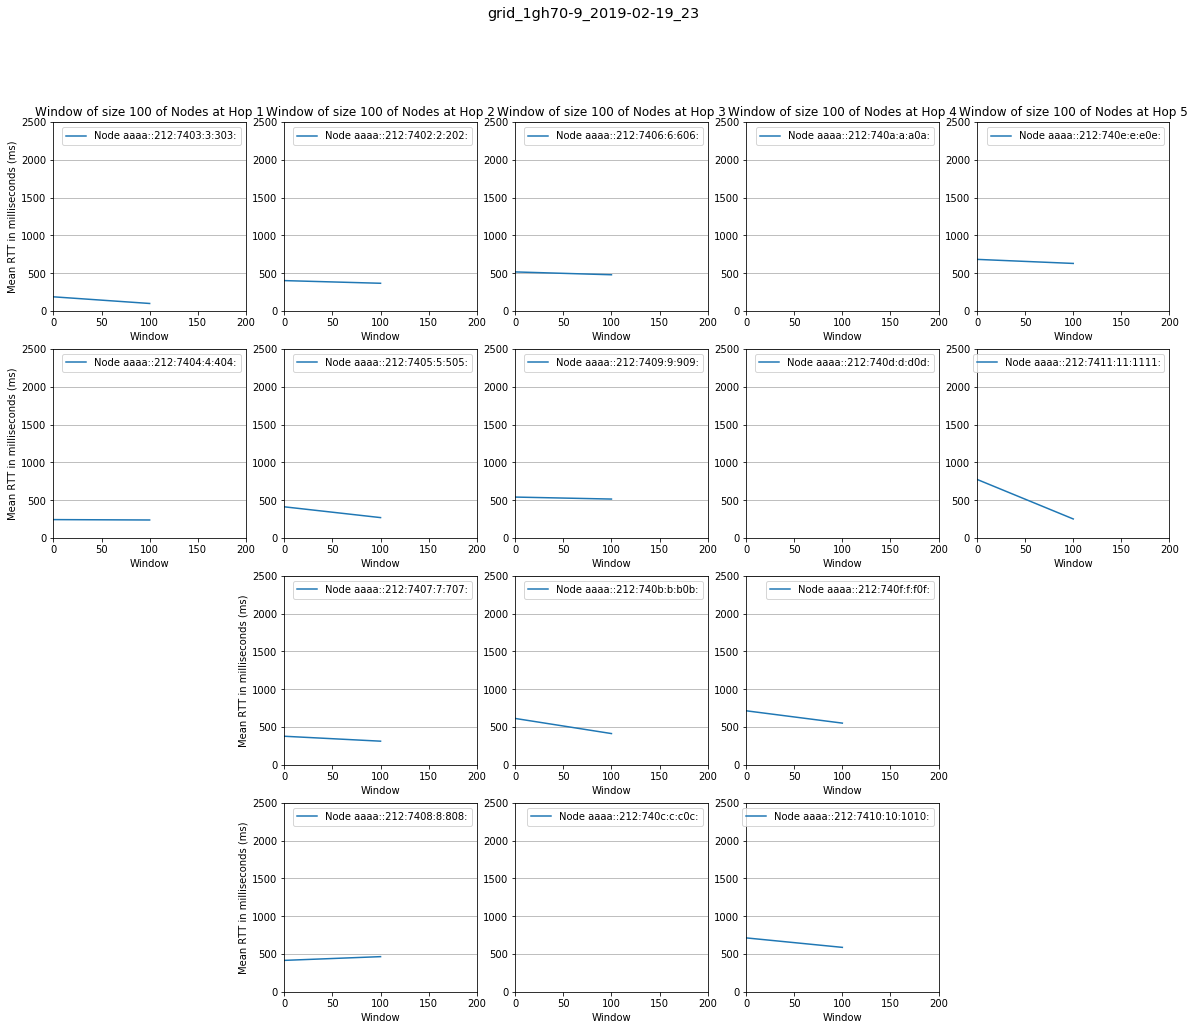

In [3]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 25)
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 50)
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 100)


Outliers => points our of mean-2std <= x(t) <= mean + 2std

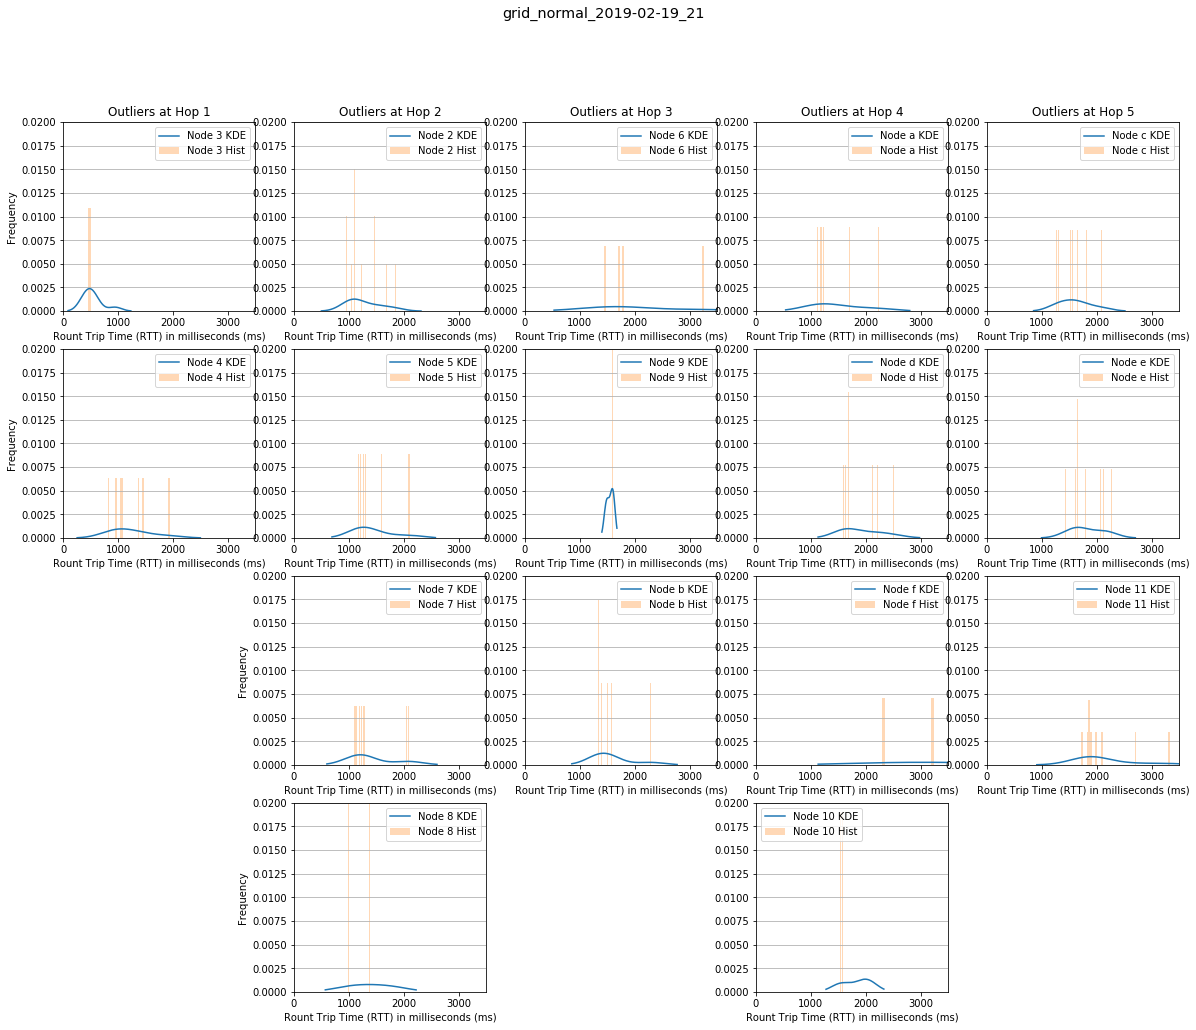

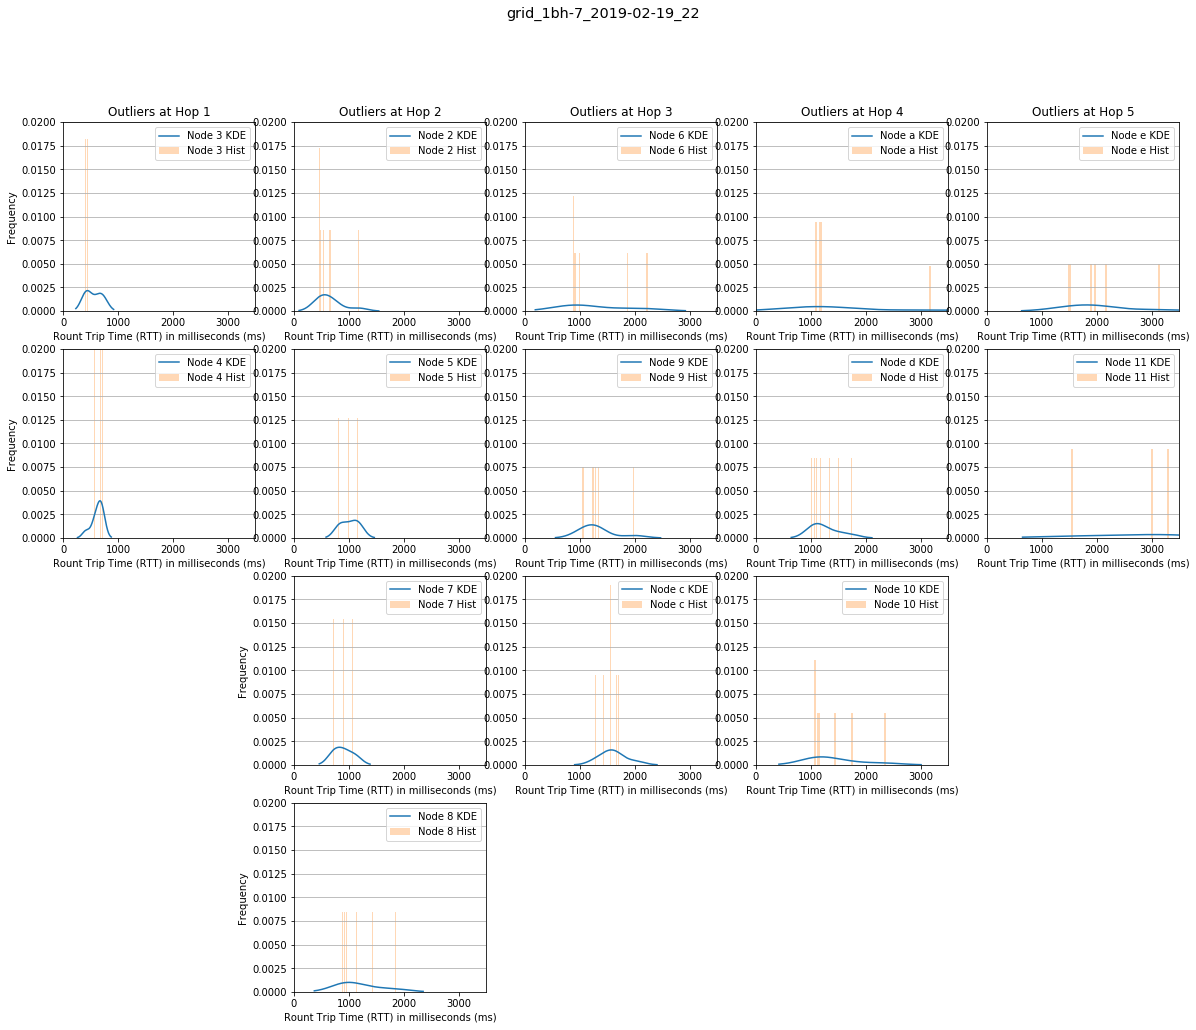

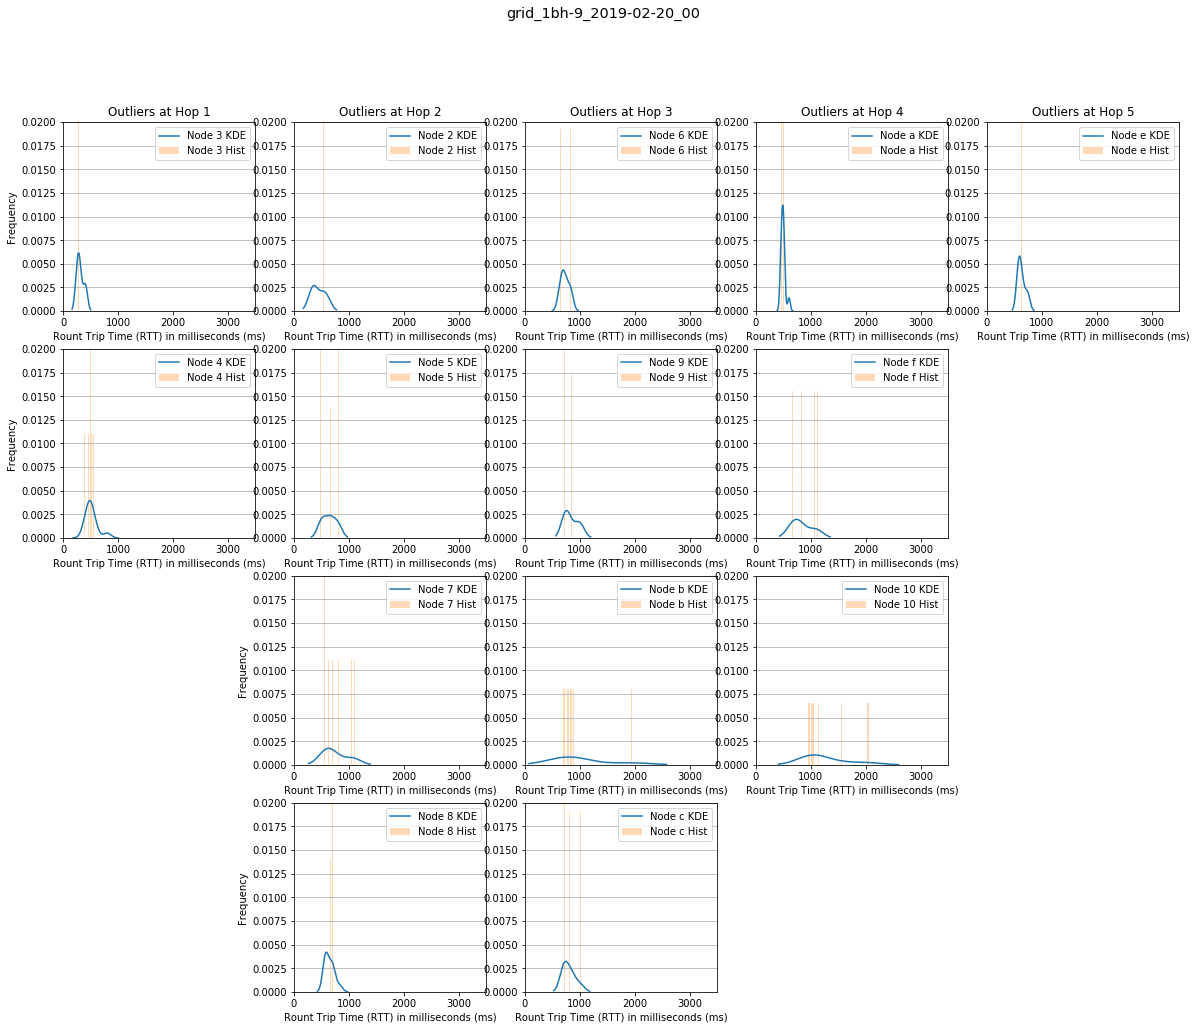

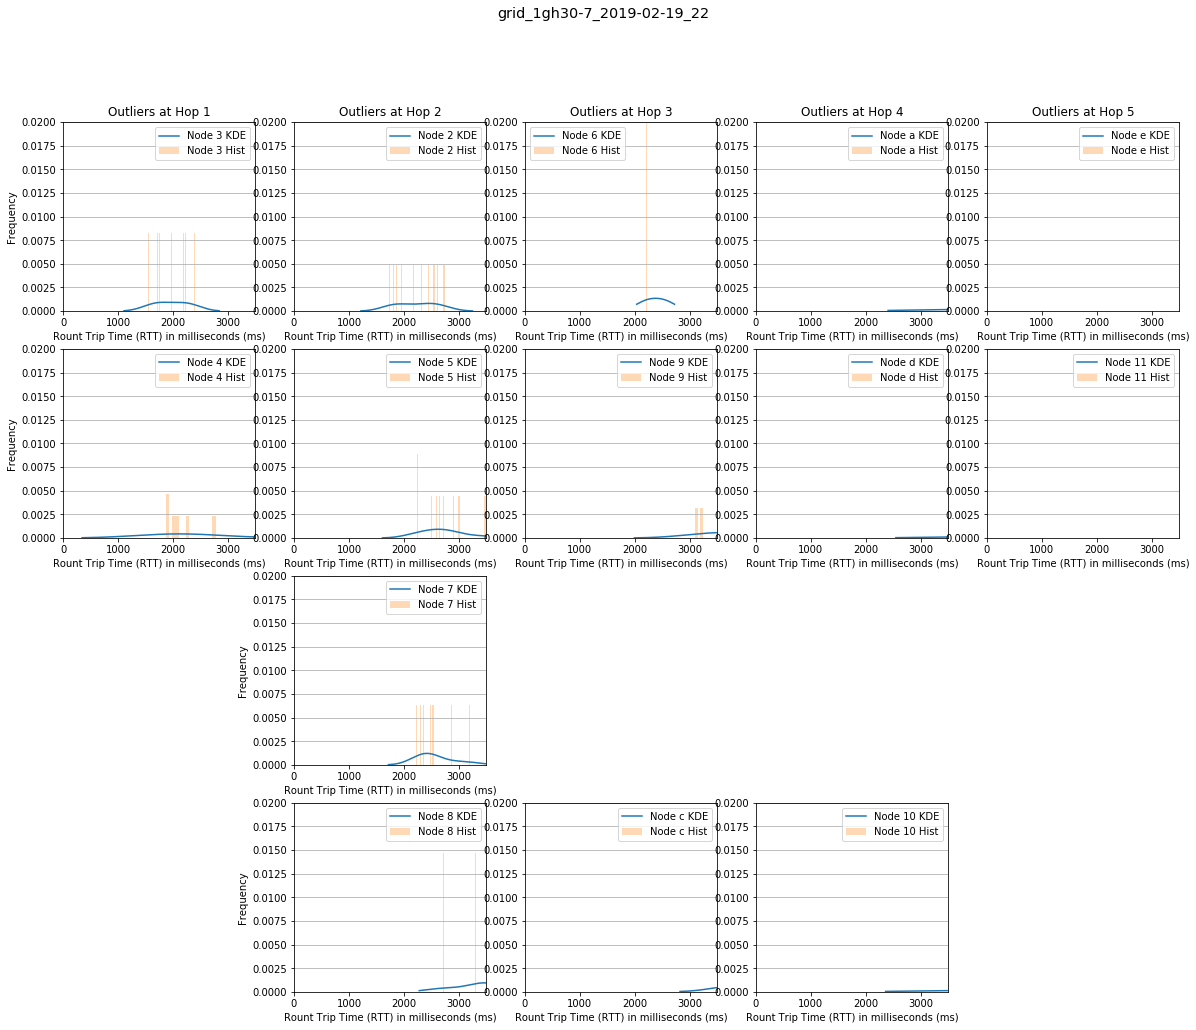

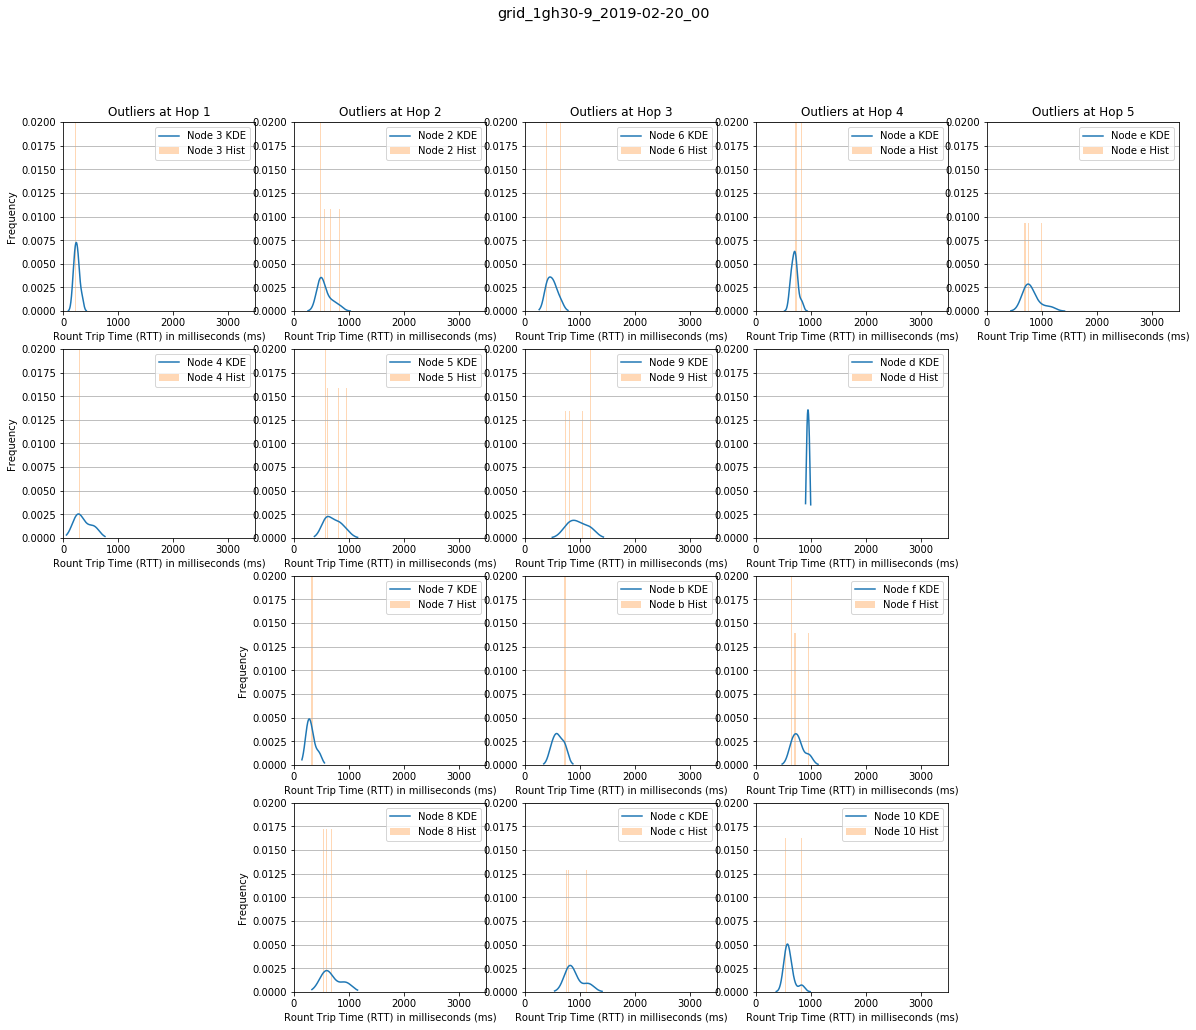

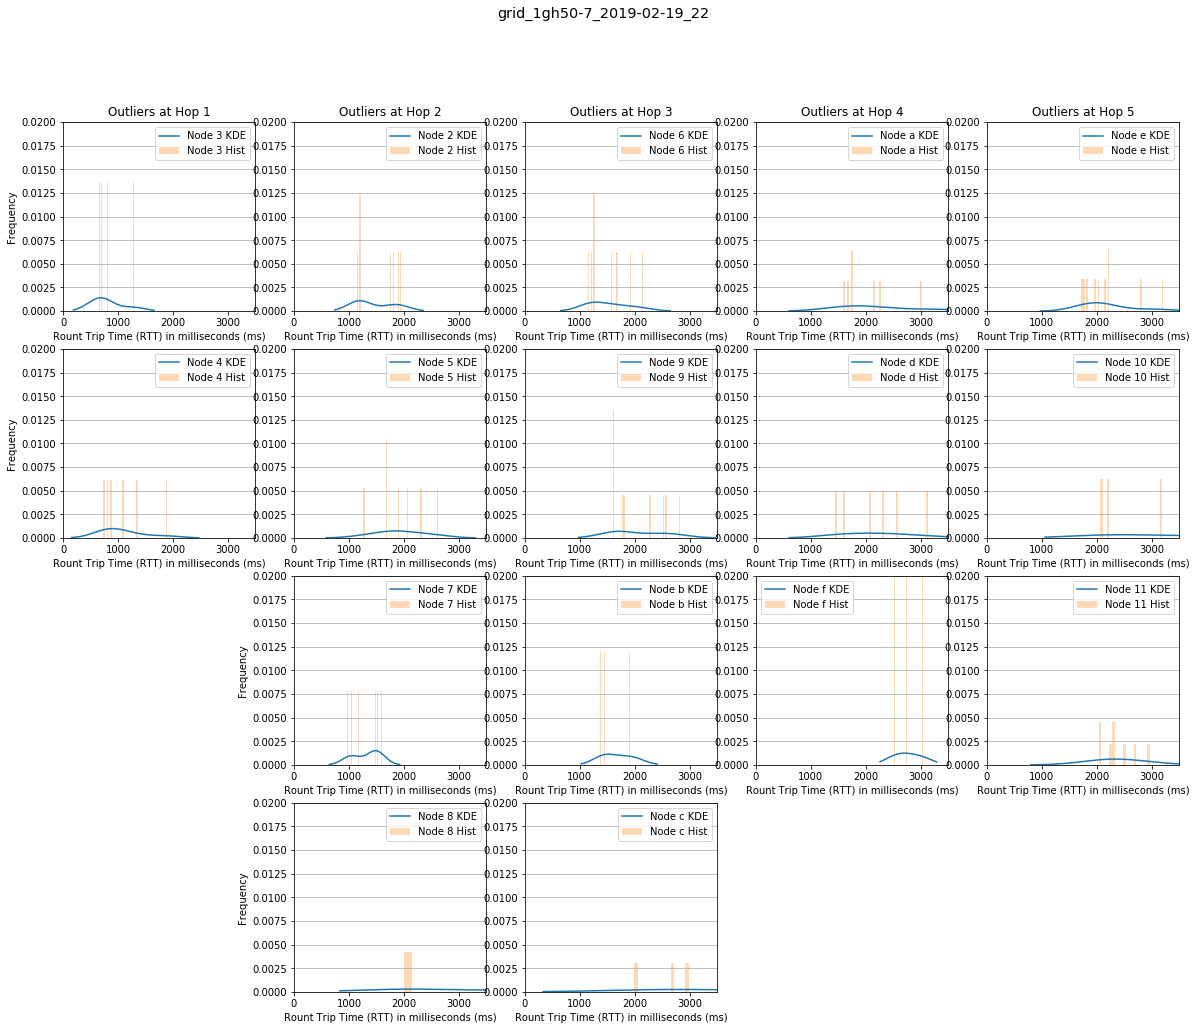

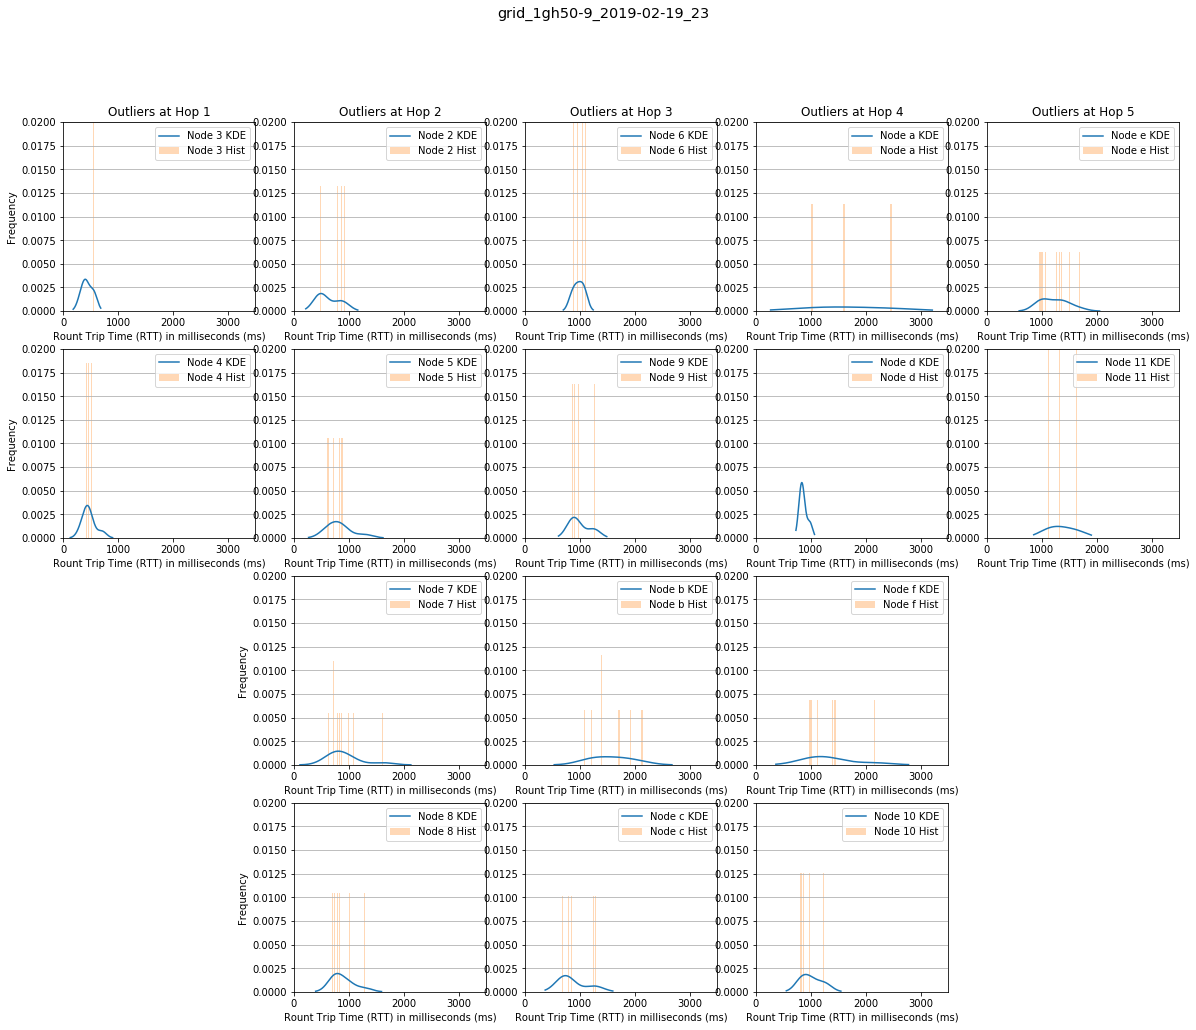

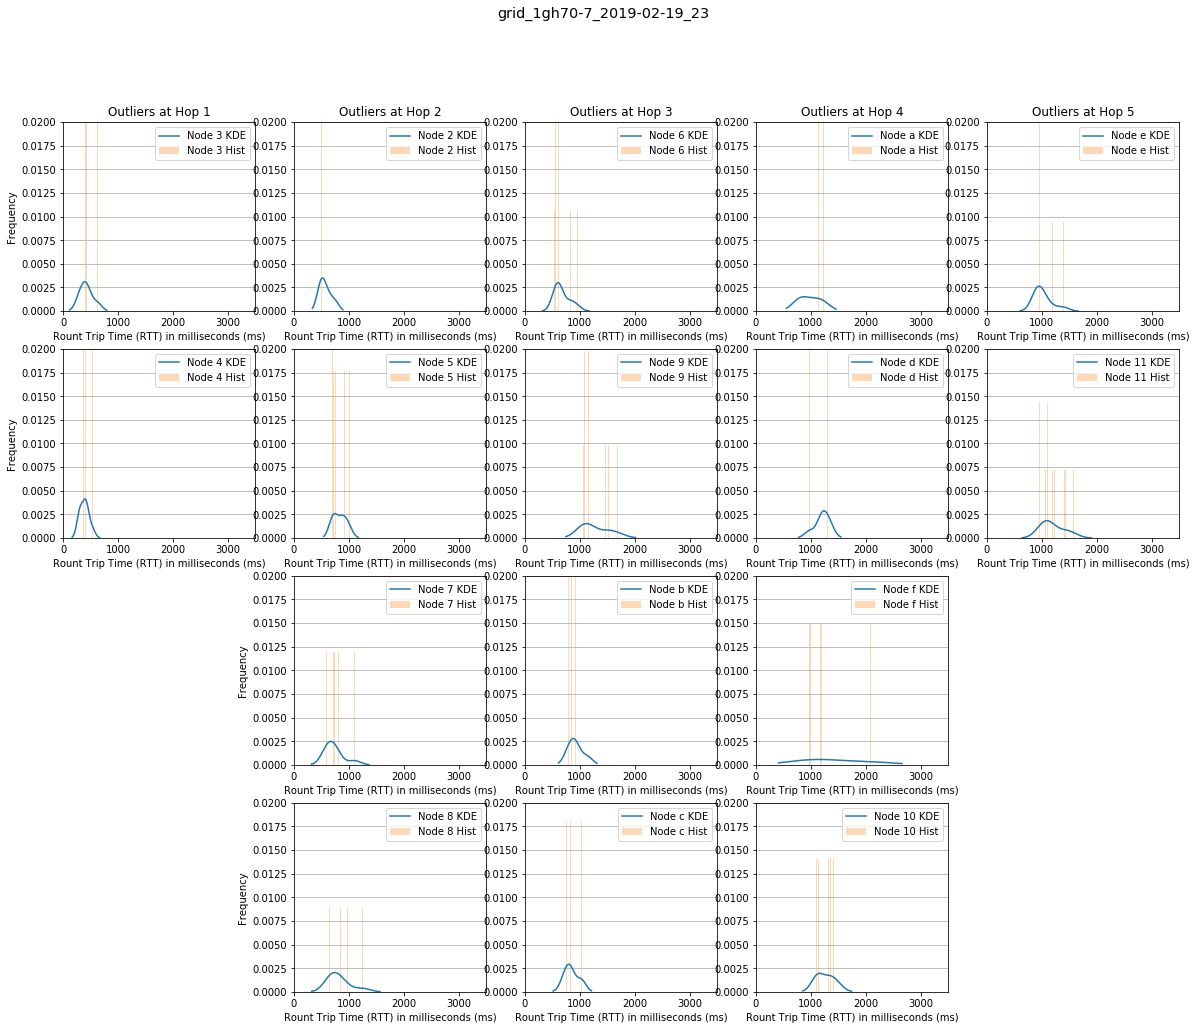

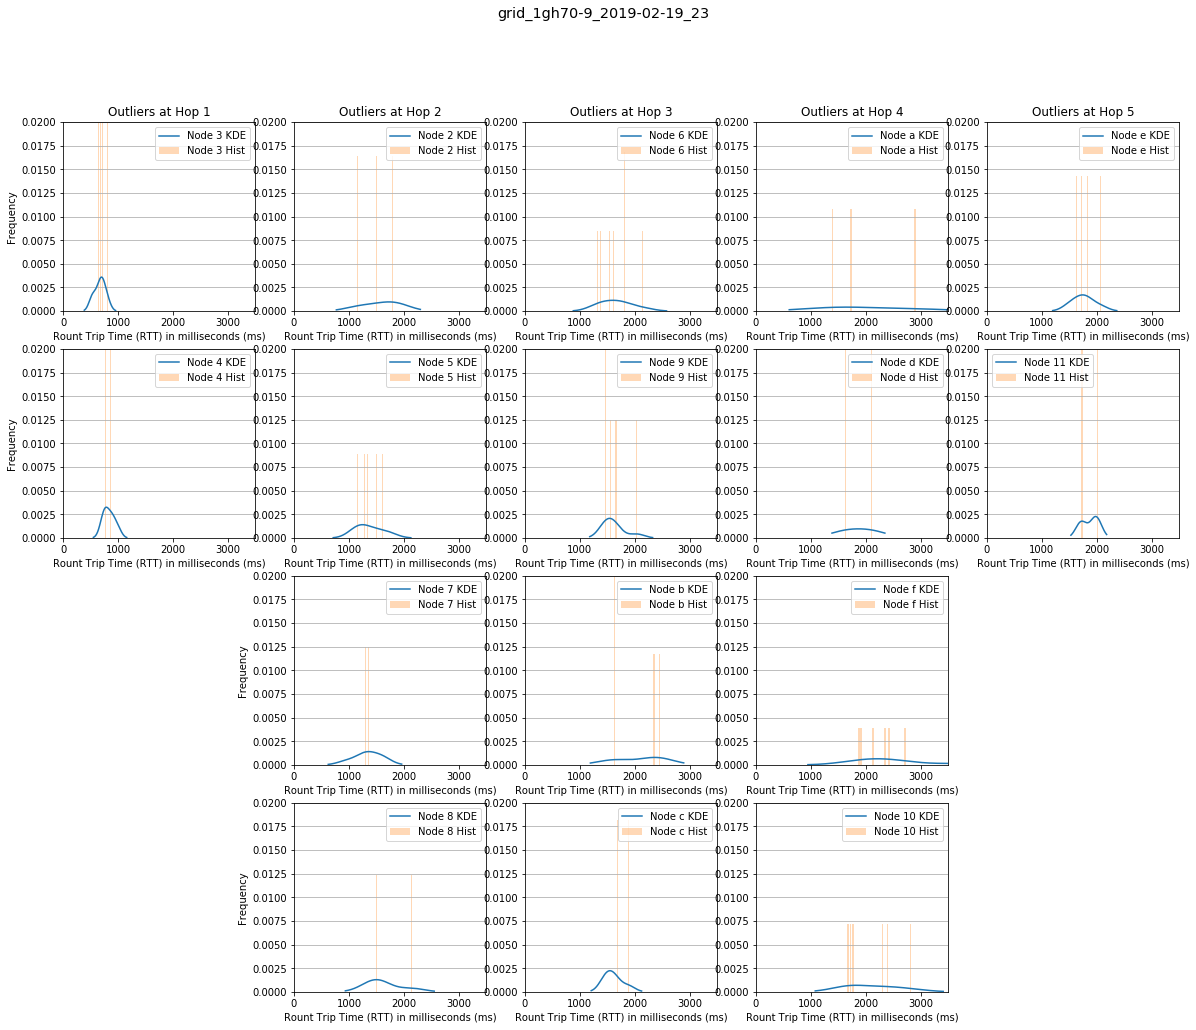

In [4]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_outliers_hops_nodes(nodes, outliers, 3500, 0.02, row[1])

IQR outliers

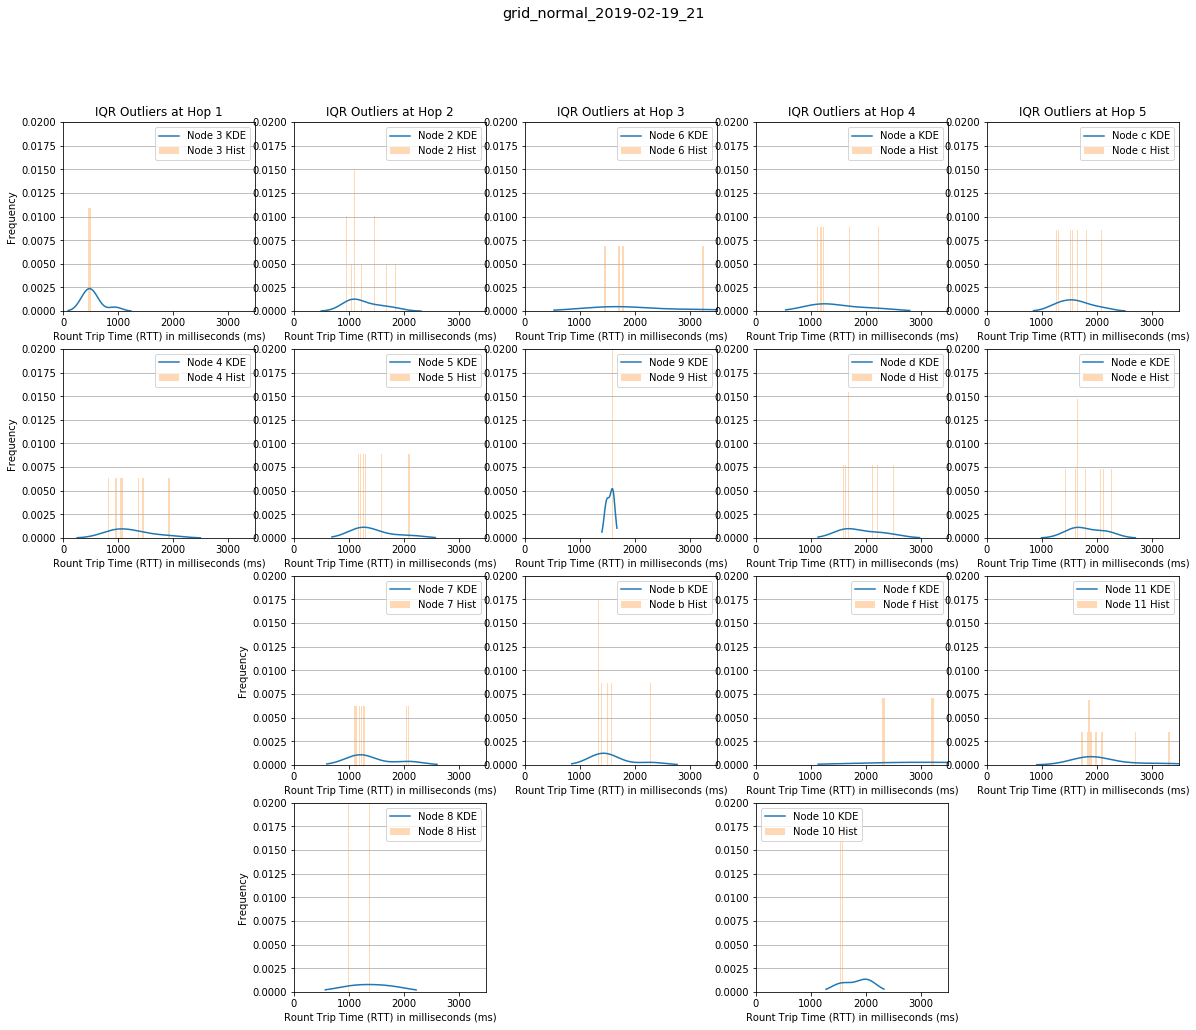

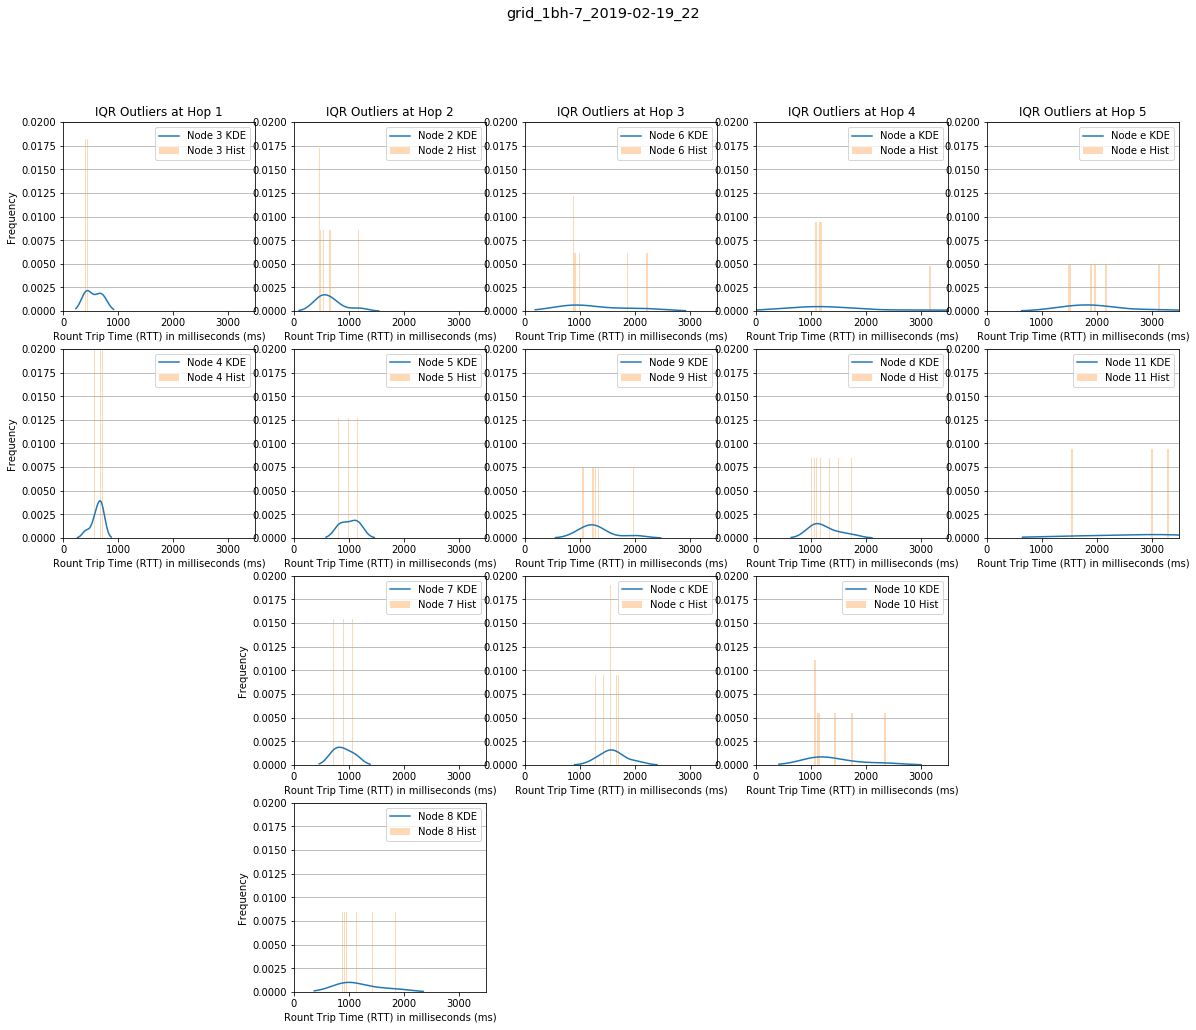

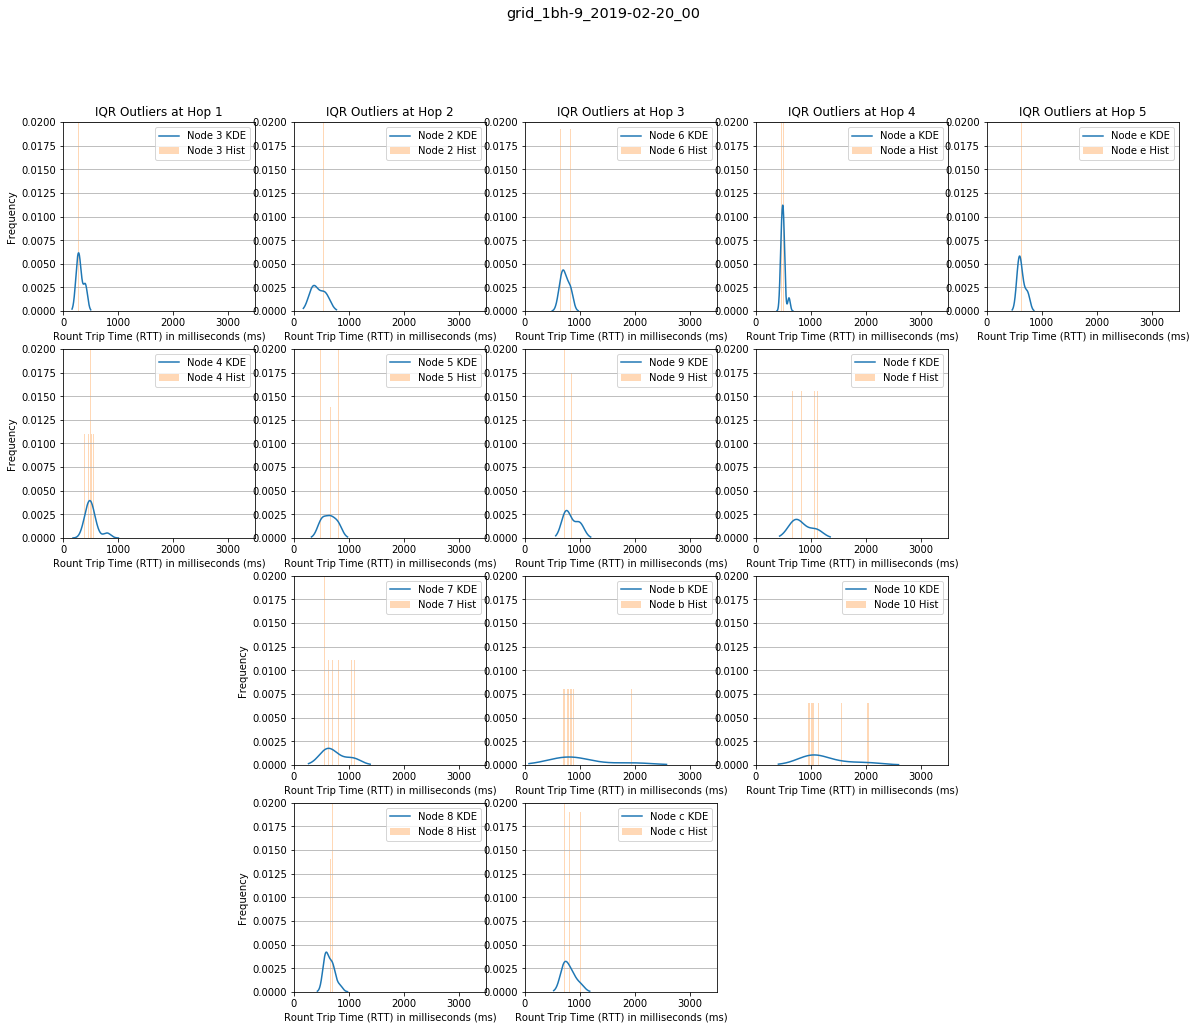

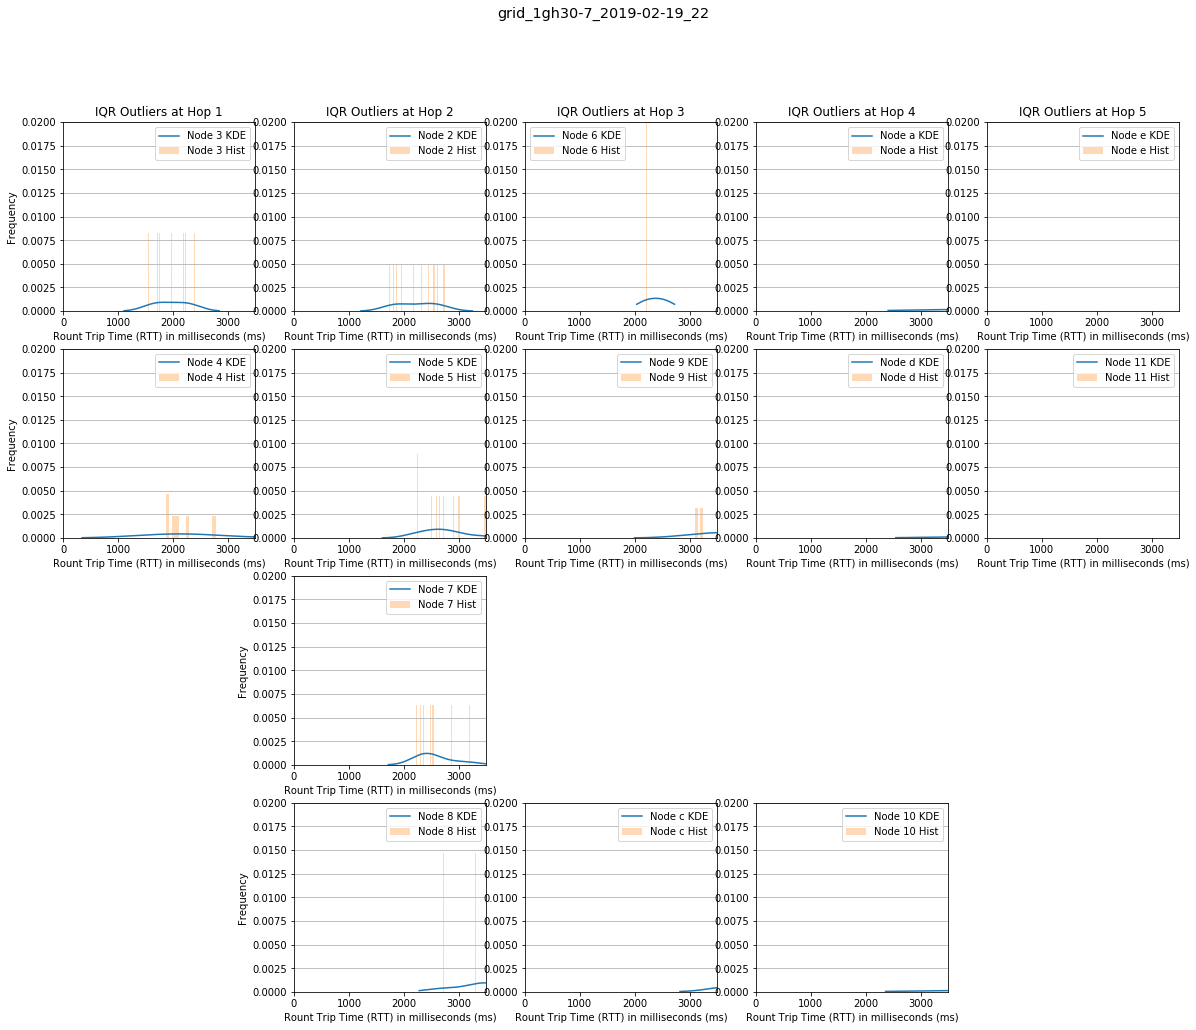

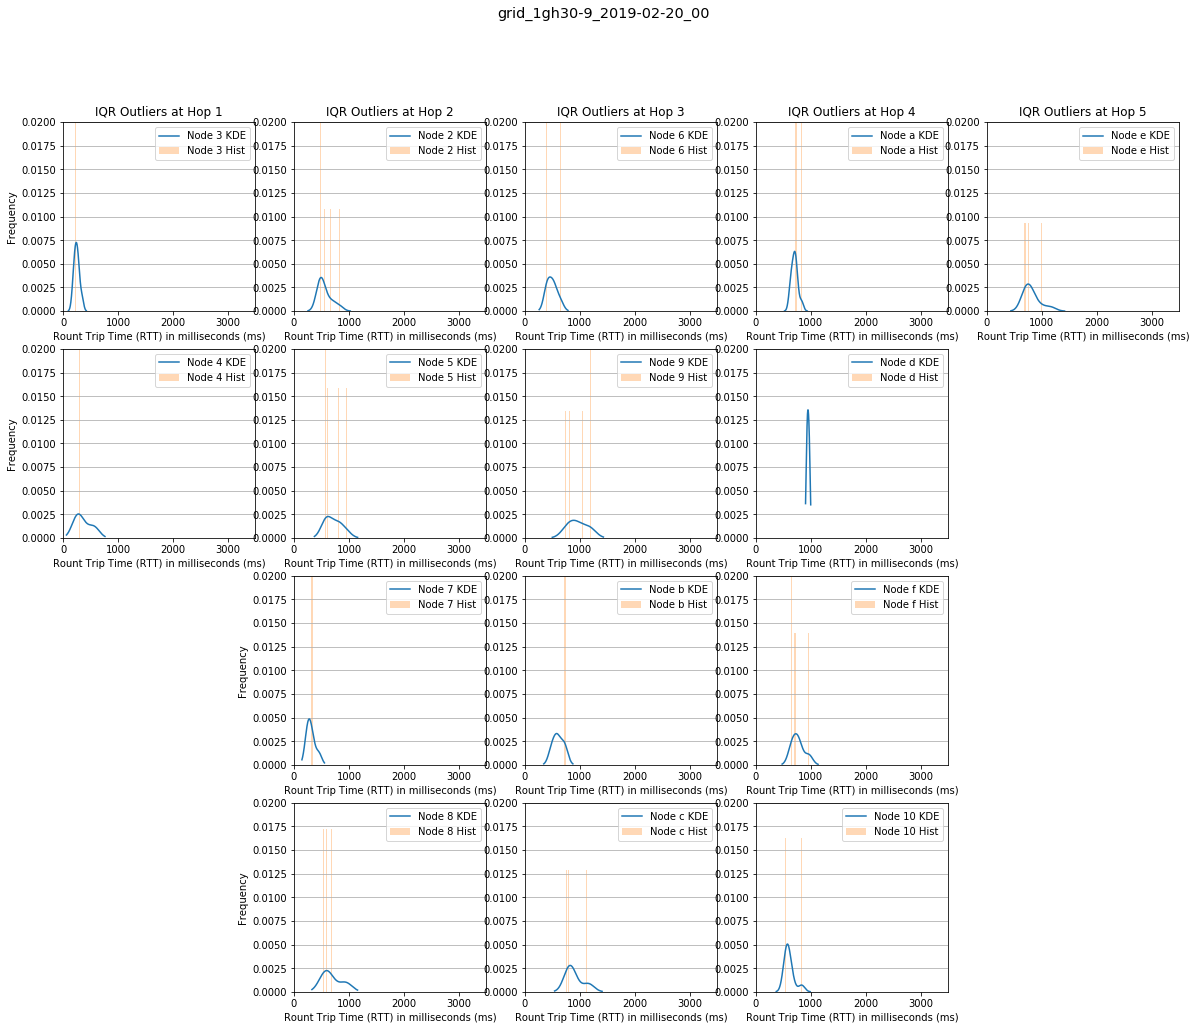

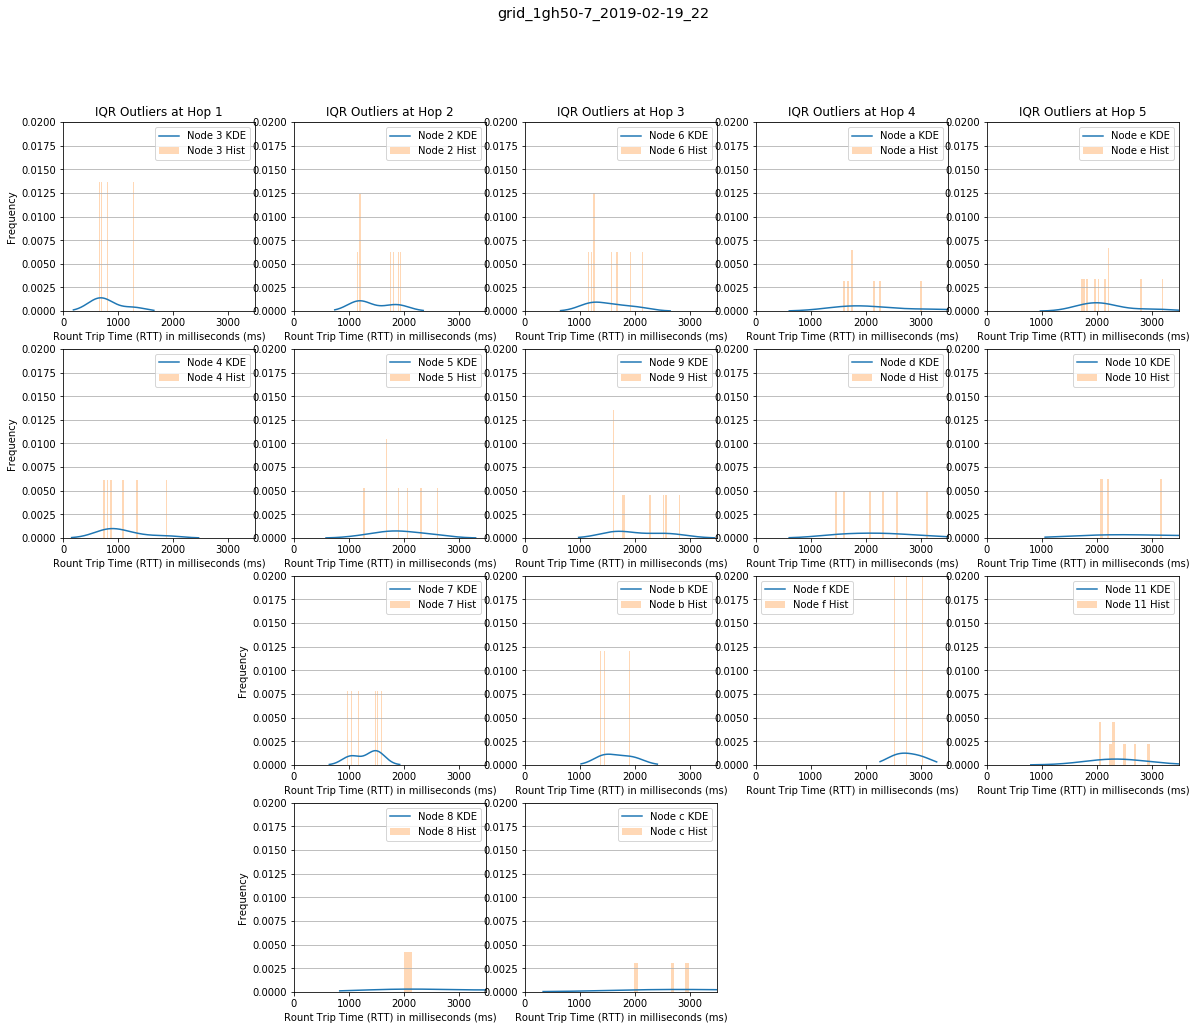

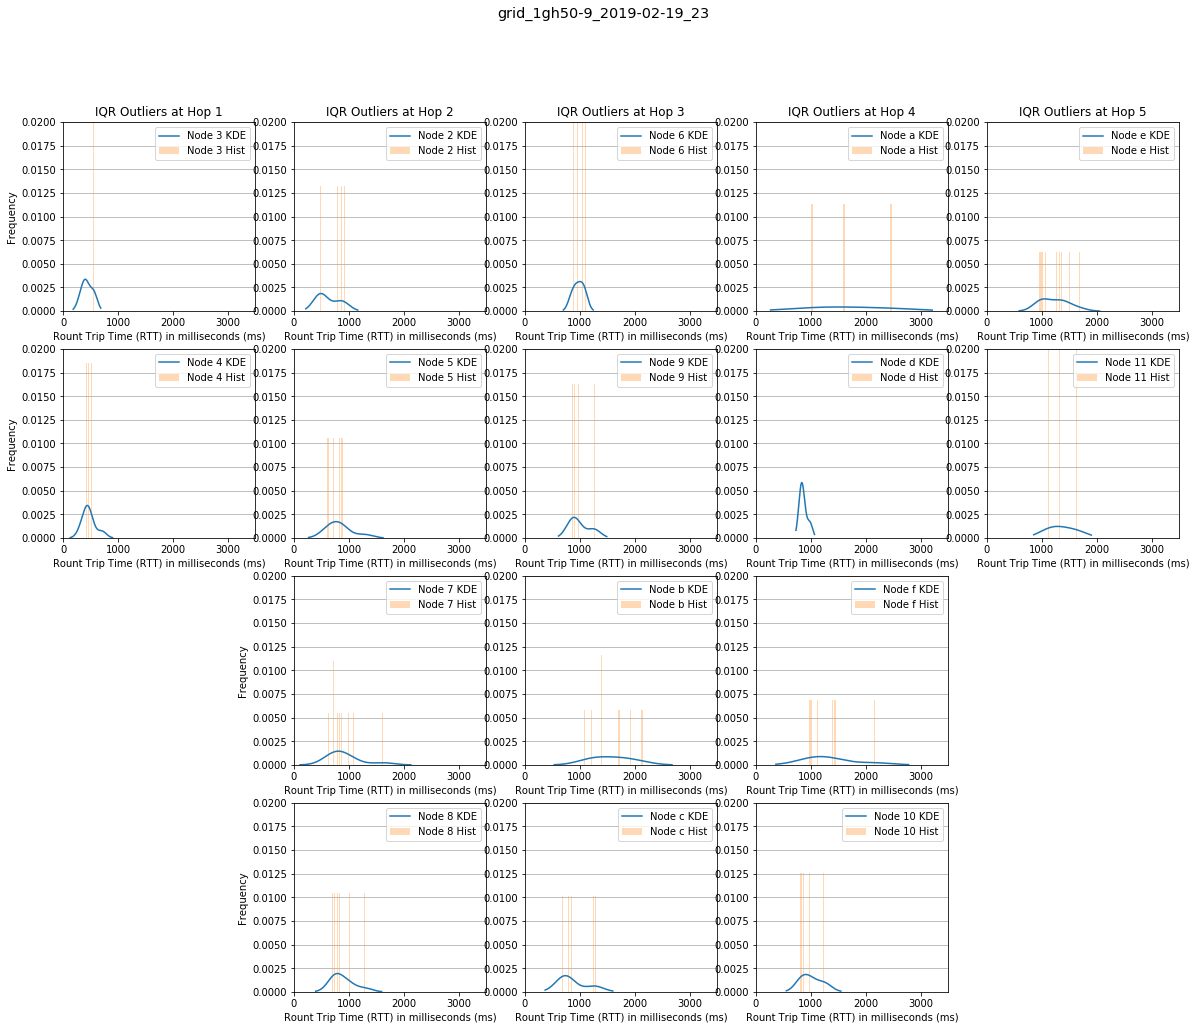

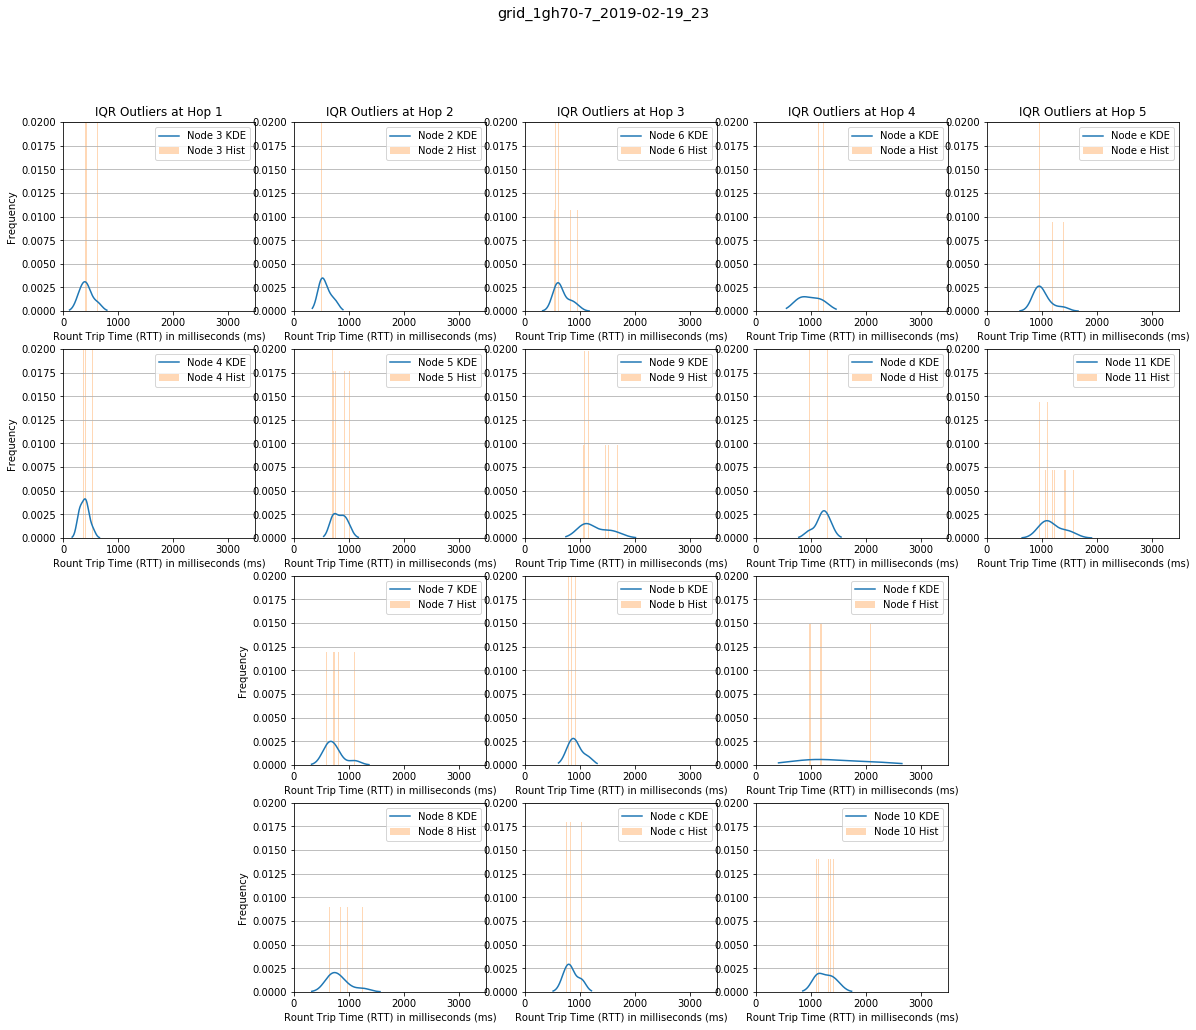

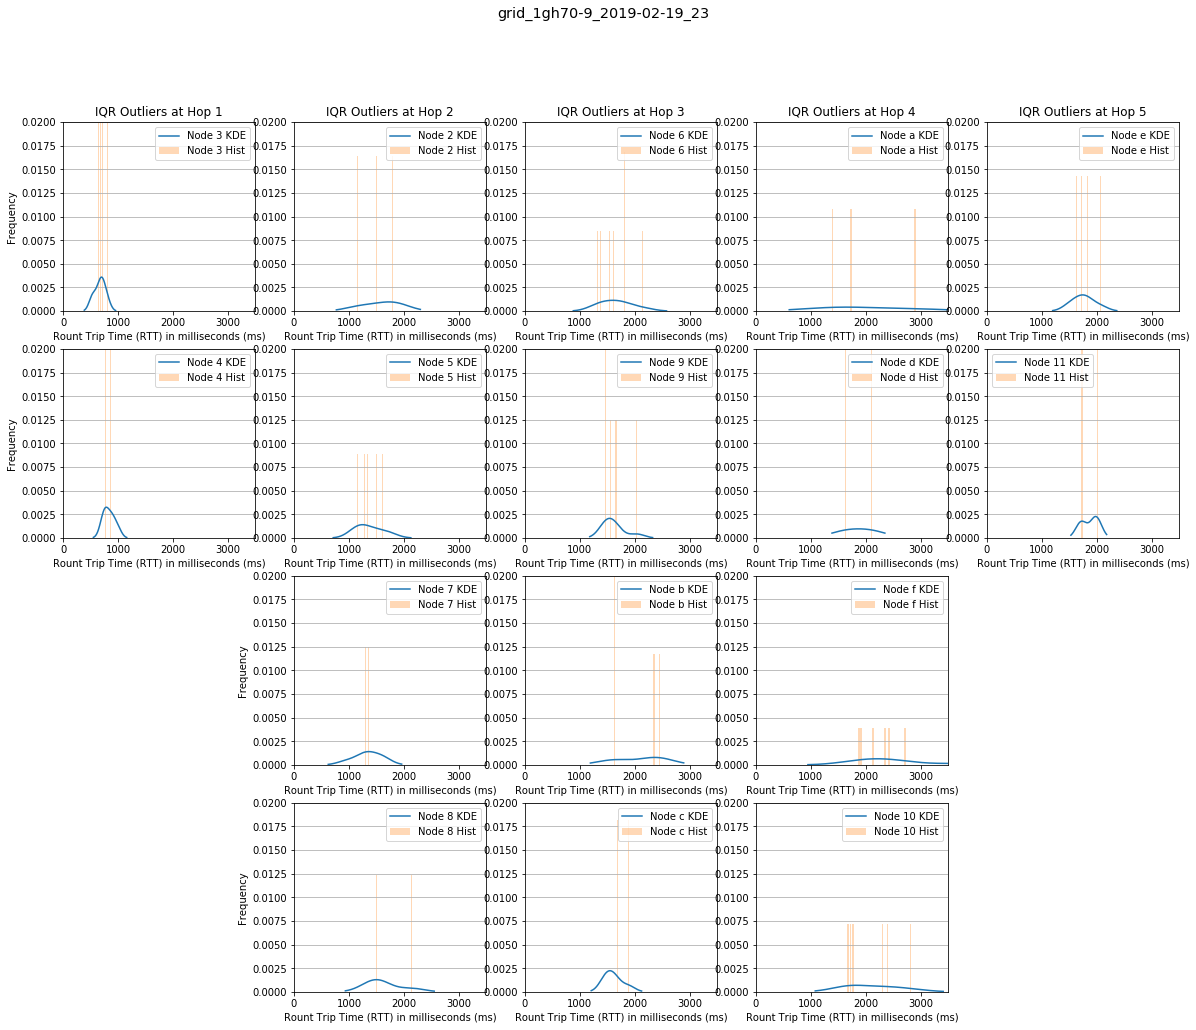

In [5]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    iqr_outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_iqr_outliers_hops_nodes(nodes, iqr_outliers, 3500, 0.02, row[1])

Compute statistics for each node in every experiment

In [6]:
stats = None

for row in plots:
    label = 'Normal'
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'GH'
    elif row[1].find('bh') >= 0:
        label = 'BH'
        
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    experiment = row[1]
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)])

stats = stats.sort_values(by=['experiment', 'hop']).reset_index(drop=True)


In [7]:
stats

node_id                  experiment  count        mean  \
0      aaaa::212:7403:3:303:    grid_1bh-7_2019-02-19_22    149  124.730872   
1      aaaa::212:7404:4:404:    grid_1bh-7_2019-02-19_22    141  111.178014   
2      aaaa::212:7407:7:707:    grid_1bh-7_2019-02-19_22    147  271.571429   
3      aaaa::212:7408:8:808:    grid_1bh-7_2019-02-19_22    156  278.602564   
4      aaaa::212:7402:2:202:    grid_1bh-7_2019-02-19_22    172  158.759884   
5      aaaa::212:7405:5:505:    grid_1bh-7_2019-02-19_22    147  258.408163   
6      aaaa::212:7406:6:606:    grid_1bh-7_2019-02-19_22    160  310.575000   
7      aaaa::212:7409:9:909:    grid_1bh-7_2019-02-19_22    145  387.200000   
8      aaaa::212:740c:c:c0c:    grid_1bh-7_2019-02-19_22    153  456.960784   
9      aaaa::212:740d:d:d0d:    grid_1bh-7_2019-02-19_22    144  431.513889   
10     aaaa::212:740a:a:a0a:    grid_1bh-7_2019-02-19_22    161  398.596273   
11   aaaa::212:7410:10:1010:    grid_1bh-7_2019-02-19_22    138  422.463768   
12     aaaa::212:740e:e:e0e:    grid_1bh-7_2019-02-19_22    178  564.983146   
13   aaaa::212:7411:11:1111:    grid_1bh-7_2019-02-19_22    136  623.823529   
14     aaaa::212:7403:3:303:    grid_1bh-9_2019-02-20_00    187   91.108021   
15     aaaa::212:7404:4:404:    grid_1bh-9_2019-02-20_00    163  109.888957   
16     aaaa::212:7402:2:202:    grid_1bh-9_2019-02-20_00    179  134.249721   
17     aaaa::212:7408:8:808:    grid_1bh-9_2019-02-20_00    155  212.083871   
18     aaaa::212:7407:7:707:    grid_1bh-9_2019-02-20_00    187  189.401070   
19     aaaa::212:7405:5:505:    grid_1bh-9_2019-02-20_00    174  177.827586   
20     aaaa::212:7409:9:909:    grid_1bh-9_2019-02-20_00    149  273.966443   
21     aaaa::212:7406:6:606:    grid_1bh-9_2019-02-20_00    180  278.383333   
22     aaaa::212:740b:b:b0b:    grid_1bh-9_2019-02-20_00    154  248.103896   
23     aaaa::212:740c:c:c0c:    grid_1bh-9_2019-02-20_00    172  279.877907   
24     aaaa::212:740a:a:a0a:    grid_1bh-9_2019-02-20_00    180  251.511111   
25   aaaa::212:7410:10:1010:    grid_1bh-9_2019-02-20_00    143  416.958042   
26     aaaa::212:740f:f:f0f:    grid_1bh-9_2019-02-20_00    168  338.726190   
27     aaaa::212:740e:e:e0e:    grid_1bh-9_2019-02-20_00    187  343.342246   
28     aaaa::212:7404:4:404:  grid_1gh30-7_2019-02-19_22    117  347.147863   
29     aaaa::212:7403:3:303:  grid_1gh30-7_2019-02-19_22    126  363.816667   
..                       ...                         ...    ...         ...   
110    aaaa::212:7402:2:202:  grid_1gh70-9_2019-02-19_23    114  356.313158   
111    aaaa::212:7408:8:808:  grid_1gh70-9_2019-02-19_23    115  371.504348   
112    aaaa::212:7407:7:707:  grid_1gh70-9_2019-02-19_23    135  316.211852   
113    aaaa::212:7405:5:505:  grid_1gh70-9_2019-02-19_23    110  319.578182   
114    aaaa::212:7409:9:909:  grid_1gh70-9_2019-02-19_23     95  461.484211   
115    aaaa::212:7406:6:606:  grid_1gh70-9_2019-02-19_23    120  443.225000   
116    aaaa::212:740b:b:b0b:  grid_1gh70-9_2019-02-19_23    117  513.811966   
117    aaaa::212:740c:c:c0c:  grid_1gh70-9_2019-02-19_23     94  501.851064   
118    aaaa::212:740a:a:a0a:  grid_1gh70-9_2019-02-19_23     97  553.103093   
119    aaaa::212:740d:d:d0d:  grid_1gh70-9_2019-02-19_23     42  641.547619   
120  aaaa::212:7410:10:1010:  grid_1gh70-9_2019-02-19_23     96  622.614583   
121    aaaa::212:740f:f:f0f:  grid_1gh70-9_2019-02-19_23    116  579.577586   
122  aaaa::212:7411:11:1111:  grid_1gh70-9_2019-02-19_23     94  687.414894   
123    aaaa::212:740e:e:e0e:  grid_1gh70-9_2019-02-19_23    117  618.290598   
124    aaaa::212:7403:3:303:   grid_normal_2019-02-19_21    140  105.337857   
125    aaaa::212:7404:4:404:   grid_normal_2019-02-19_21    134  161.059701   
126    aaaa::212:7408:8:808:   grid_normal_2019-02-19_21     94  260.787234   
127    aaaa::212:7402:2:202:   grid_normal_2019-02-19_21    149  245.693289   
128    aaaa::212:7407:7:707:   grid_normal_2019-02-19_21    125  299.29